<a href="https://colab.research.google.com/github/yorketh/machine-learning/blob/master/TS_demand_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns
!pip install -U tf-nightly
from tensorflow import keras
import pylab
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16, 9)
pylab.rcParams['figure.facecolor'] = 'w'
figure(num=None, figsize=(18,9), dpi=80, facecolor='w', edgecolor='k')

Requirement already up-to-date: tf-nightly in /usr/local/lib/python3.6/dist-packages (2.4.0.dev20201005)


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:
data_2015 = pd.read_excel('2015.xlsx')
data_2016 = pd.read_excel('2016.xlsx')
data_2017 = pd.read_excel('2017.xlsx')

In [ ]:
for i in [data_2015, data_2016, data_2017]:
  print(i.info())
  print(i.describe())
  print('____________________________')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Obs          8760 non-null   int64         
 1   datetime     8760 non-null   object        
 2   date         8760 non-null   datetime64[ns]
 3   HE           8760 non-null   int64         
 4   actual_load  8736 non-null   float64       
 5   temperature  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 410.8+ KB
None
               Obs           HE   actual_load  temperature
count  8760.000000  8760.000000  8.736000e+03  8760.000000
mean   4380.500000    12.500000  1.047869e+06    10.125000
std    2528.938512     6.922582  2.786944e+05    10.117057
min       1.000000     1.000000  0.000000e+00   -19.000000
25%    2190.750000     6.750000  8.315832e+05     2.000000
50%    4380.500000    12.500000  1.054201e+06     9.000000
7

actual_load содержит по 24 missing values для 2015 и 2016 годов, т.е. не хватает информации за 2 суток. Для 2015 г. это 25 октября, для 2016 - 31 октября.

In [ ]:
data_2015.loc[data_2015.actual_load.isnull()]

Obs          datetime       date  HE  actual_load  temperature
7128  7129  25OCT15:01:00:00 2015-10-25   1          NaN            9
7129  7130  25OCT15:02:00:00 2015-10-25   2          NaN            9
7130  7131  25OCT15:03:00:00 2015-10-25   3          NaN            9
7131  7132  25OCT15:04:00:00 2015-10-25   4          NaN            9
7132  7133  25OCT15:05:00:00 2015-10-25   5          NaN            9
7133  7134  25OCT15:06:00:00 2015-10-25   6          NaN            8
7134  7135  25OCT15:07:00:00 2015-10-25   7          NaN            8
7135  7136  25OCT15:08:00:00 2015-10-25   8          NaN            8
7136  7137  25OCT15:09:00:00 2015-10-25   9          NaN            9
7137  7138  25OCT15:10:00:00 2015-10-25  10          NaN            9
7138  7139  25OCT15:11:00:00 2015-10-25  11          NaN            9
7139  7140  25OCT15:12:00:00 2015-10-25  12          NaN           10
7140  7141  25OCT15:13:00:00 2015-10-25  13          NaN           10
7141  7142  25OCT15:14:00:00 2015-10-25  14          NaN           10
7142  7143  25OCT15:15:00:00 2015-10-25  15          NaN           10
7143  7144  25OCT15:16:00:00 2015-10-25  16          NaN            9
7144  7145  25OCT15:17:00:00 2015-10-25  17          NaN            9
7145  7146  25OCT15:18:00:00 2015-10-25  18          NaN            8
7146  7147  25OCT15:19:00:00 2015-10-25  19          NaN            8
7147  7148  25OCT15:20:00:00 2015-10-25  20          NaN            8
7148  7149  25OCT15:21:00:00 2015-10-25  21          NaN            7
7149  7150  25OCT15:22:00:00 2015-10-25  22          NaN            6
7150  7151  25OCT15:23:00:00 2015-10-25  23          NaN            6
7151  7152  25OCT15:24:00:00 2015-10-25  24          NaN            5

In [ ]:
data_2016.loc[data_2016.actual_load.isnull()]

Obs          datetime       date  HE  actual_load temperature
7296  7297  31OCT16:01:00:00 2016-10-31   1          NaN           3
7297  7298  31OCT16:02:00:00 2016-10-31   2          NaN           3
7298  7299  31OCT16:03:00:00 2016-10-31   3          NaN           3
7299  7300  31OCT16:04:00:00 2016-10-31   4          NaN           3
7300  7301  31OCT16:05:00:00 2016-10-31   5          NaN           3
7301  7302  31OCT16:06:00:00 2016-10-31   6          NaN           3
7302  7303  31OCT16:07:00:00 2016-10-31   7          NaN           3
7303  7304  31OCT16:08:00:00 2016-10-31   8          NaN           3
7304  7305  31OCT16:09:00:00 2016-10-31   9          NaN           3
7305  7306  31OCT16:10:00:00 2016-10-31  10          NaN           1
7306  7307  31OCT16:11:00:00 2016-10-31  11          NaN           1
7307  7308  31OCT16:12:00:00 2016-10-31  12          NaN           2
7308  7309  31OCT16:13:00:00 2016-10-31  13          NaN           2
7309  7310  31OCT16:14:00:00 2016-10-31  14          NaN           1
7310  7311  31OCT16:15:00:00 2016-10-31  15          NaN           1
7311  7312  31OCT16:16:00:00 2016-10-31  16          NaN           1
7312  7313  31OCT16:17:00:00 2016-10-31  17          NaN           0
7313  7314  31OCT16:18:00:00 2016-10-31  18          NaN           0
7314  7315  31OCT16:19:00:00 2016-10-31  19          NaN           0
7315  7316  31OCT16:20:00:00 2016-10-31  20          NaN           0
7316  7317  31OCT16:21:00:00 2016-10-31  21          NaN           0
7317  7318  31OCT16:22:00:00 2016-10-31  22          NaN          -1
7318  7319  31OCT16:23:00:00 2016-10-31  23          NaN          -1
7319  7320  31OCT16:24:00:00 2016-10-31  24          NaN          -1

Неправильное форматирование

In [ ]:
data_2016.temperature = data_2016.temperature.apply(lambda x: str(x).replace('°', ''))
data_2016.temperature = data_2016.temperature.apply(lambda x: str(x).replace('+', ''))

In [ ]:
data_2016.temperature = data_2016.temperature.astype('int64')
data_2017.actual_load = data_2017.actual_load.astype('float64')

In [ ]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Obs          8784 non-null   int64         
 1   datetime     8784 non-null   object        
 2   date         8784 non-null   datetime64[ns]
 3   HE           8784 non-null   int64         
 4   actual_load  8760 non-null   float64       
 5   temperature  8784 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 411.9+ KB


In [ ]:
data_concat = pd.concat([data_2015, data_2016, data_2017]) # объединяем в 1 датасет
data_concat.drop('datetime', inplace=True, axis=1)
data_concat = data_concat.set_index('date')
data_concat.drop('Obs', inplace=True, axis=1)
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2015-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HE           26304 non-null  int64  
 1   actual_load  26256 non-null  float64
 2   temperature  26304 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 822.0 KB


In [ ]:
data_concat.head()

HE  actual_load  temperature
date                                    
2015-01-01   1    1134196.0           -6
2015-01-01   2    1068647.0           -5
2015-01-01   3    1000581.0           -5
2015-01-01   4     947958.0           -5
2015-01-01   5     905317.0           -5

График потребности в электроэнергии

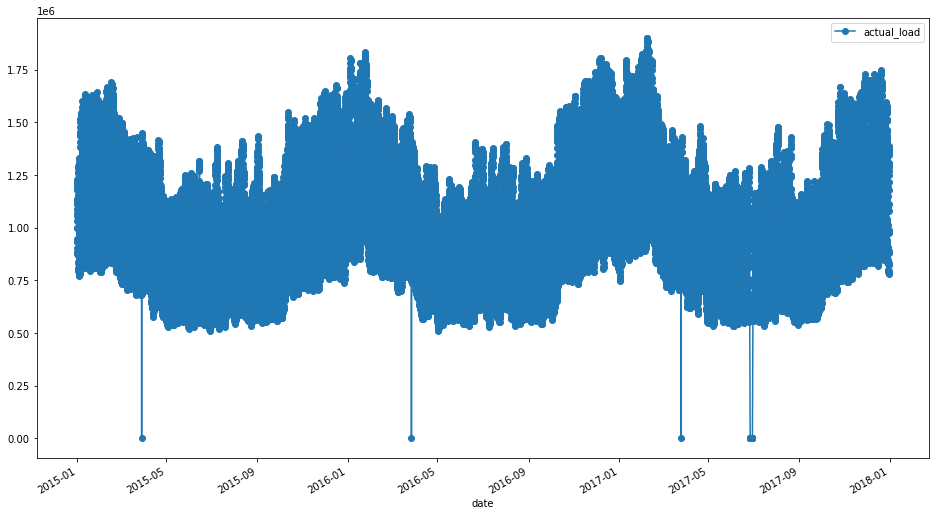

In [ ]:
data_concat.plot(y='actual_load', marker='o')

Температрурный график

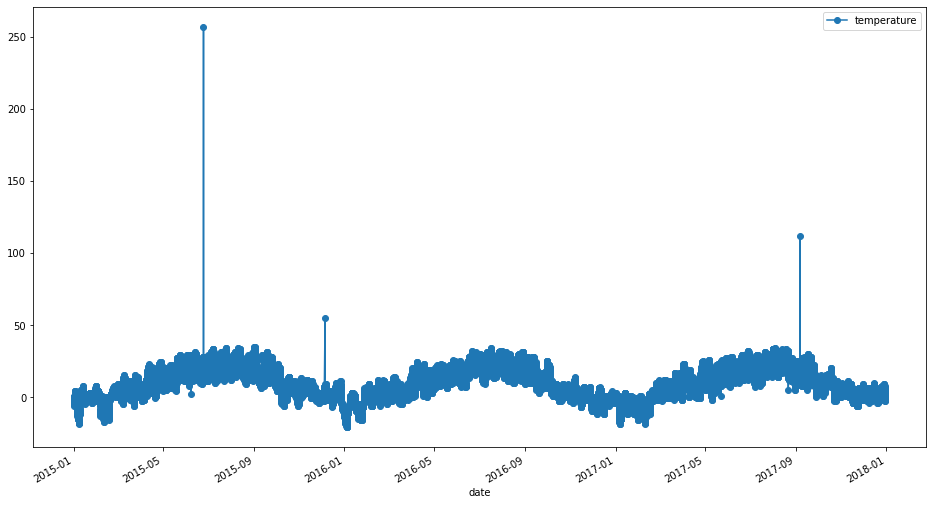

In [ ]:
data_concat[['temperature']].plot(marker='o')

Уберем явные аномалии

In [ ]:
data_concat.loc[data_concat.temperature>40]

HE  actual_load  temperature
date                                    
2015-06-25  13    1178950.0          257
2015-12-06   1     944820.0           55
2017-09-07   9    1023342.0          112

In [ ]:
data_concat.loc[data_concat.index=='2015-06-25']

HE  actual_load  temperature
date                                    
2015-06-25   1     753246.0           19
2015-06-25   2     667657.0           18
2015-06-25   3     627766.0           17
2015-06-25   4     608504.0           17
2015-06-25   5     587371.0           16
2015-06-25   6     597551.0           17
2015-06-25   7     696866.0           19
2015-06-25   8     860235.0           19
2015-06-25   9    1006112.0           23
2015-06-25  10    1112290.0           23
2015-06-25  11    1161893.0           24
2015-06-25  12    1176644.0           25
2015-06-25  13    1178950.0          257
2015-06-25  14    1200622.0           27
2015-06-25  15    1206532.0           28
2015-06-25  16    1160717.0           28
2015-06-25  17    1182942.0           28
2015-06-25  18    1169285.0           28
2015-06-25  19    1127959.0           26
2015-06-25  20    1086037.0           26
2015-06-25  21    1045290.0           25
2015-06-25  22    1063713.0           24
2015-06-25  23    1025501.0           23
2015-06-25  24     886569.0           22

In [ ]:
data_concat.loc[data_concat.index=='2015-12-06']

HE  actual_load  temperature
date                                    
2015-12-06   1     944820.0           55
2015-12-06   2     860341.0            6
2015-12-06   3     804987.0            6
2015-12-06   4     777701.0            6
2015-12-06   5     764748.0            6
2015-12-06   6     770129.0            5
2015-12-06   7     813256.0            5
2015-12-06   8     854483.0            5
2015-12-06   9     947903.0            5
2015-12-06  10    1074381.0            6
2015-12-06  11    1168433.0            6
2015-12-06  12    1194512.0            8
2015-12-06  13    1200536.0            8
2015-12-06  14    1197667.0            8
2015-12-06  15    1193319.0            9
2015-12-06  16    1200301.0            7
2015-12-06  17    1305911.0            7
2015-12-06  18    1358651.0            6
2015-12-06  19    1357069.0            6
2015-12-06  20    1343585.0            6
2015-12-06  21    1315513.0            5
2015-12-06  22    1261181.0            5
2015-12-06  23    1155409.0            6
2015-12-06  24    1023357.0            6

In [ ]:
data_concat.loc[data_concat.index=='2017-09-07']

HE  actual_load  temperature
date                                    
2017-09-07   1     711780.0           11
2017-09-07   2     632133.0           11
2017-09-07   3     597240.0           11
2017-09-07   4     578910.0           11
2017-09-07   5     577817.0           11
2017-09-07   6     612680.0           10
2017-09-07   7     729997.0           11
2017-09-07   8     923815.0           11
2017-09-07   9    1023342.0          112
2017-09-07  10    1090350.0           13
2017-09-07  11    1108640.0           14
2017-09-07  12    1099831.0           14
2017-09-07  13    1100483.0           14
2017-09-07  14    1106517.0           14
2017-09-07  15    1107835.0           15
2017-09-07  16    1104179.0           15
2017-09-07  17    1110772.0           15
2017-09-07  18    1088034.0           16
2017-09-07  19    1062020.0           16
2017-09-07  20    1091436.0           16
2017-09-07  21    1141355.0           15
2017-09-07  22    1096312.0           15
2017-09-07  23     984602.0           14
2017-09-07  24     835014.0           14

Предположим, что это были ошибки ввода

In [ ]:
data_concat.loc[data_concat.index=='2015-06-25', 'temperature'] = 25
data_concat.loc[data_concat.index=='2015-12-06',  'temperature'] = 5
data_concat.loc[data_concat.index=='2017-09-07',  'temperature'] = 11

In [ ]:
data_concat.loc[data_concat.actual_load==0]

HE  actual_load  temperature
date                                    
2015-03-29   4          0.0            2
2016-03-27   4          0.0            0
2017-03-26   4          0.0            1
2017-06-27   1          0.0           18
2017-06-27   2          0.0           19
...         ..          ...          ...
2017-06-30  20          0.0           28
2017-06-30  21          0.0           27
2017-06-30  22          0.0           25
2017-06-30  23          0.0           24
2017-06-30  24          0.0           22

[99 rows x 3 columns]

Внезапные нулевые значения потребления маловероятны, обозначим их как пропуски (для лучшей уверенности необходимо знать специфику бизнеса)

In [ ]:
data_concat.actual_load.replace({0:np.nan}, inplace=True)

In [ ]:
data_concat.isna().sum() # итого, 147 пропущенных часов

HE               0
actual_load    147
temperature      0
dtype: int64

Существует множество способов заполнить пропуски. Можно было бы использовать интерполяцию SciPy, медиану, среднее значение, моду из других периодов, попытаться предсказать значения с помощью модели-регрессора и тд. Поскольку в данном случае пропущенных значений немного, можно заполнить их вручную.

In [ ]:
data_concat.loc[data_concat.actual_load.isna()].head(50)

HE  actual_load  temperature
date                                    
2015-03-29   4          NaN            2
2015-10-25   1          NaN            9
2015-10-25   2          NaN            9
2015-10-25   3          NaN            9
2015-10-25   4          NaN            9
2015-10-25   5          NaN            9
2015-10-25   6          NaN            8
2015-10-25   7          NaN            8
2015-10-25   8          NaN            8
2015-10-25   9          NaN            9
2015-10-25  10          NaN            9
2015-10-25  11          NaN            9
2015-10-25  12          NaN           10
2015-10-25  13          NaN           10
2015-10-25  14          NaN           10
2015-10-25  15          NaN           10
2015-10-25  16          NaN            9
2015-10-25  17          NaN            9
2015-10-25  18          NaN            8
2015-10-25  19          NaN            8
2015-10-25  20          NaN            8
2015-10-25  21          NaN            7
2015-10-25  22          NaN            6
2015-10-25  23          NaN            6
2015-10-25  24          NaN            5
2016-03-27   4          NaN            0
2016-10-31   1          NaN            3
2016-10-31   2          NaN            3
2016-10-31   3          NaN            3
2016-10-31   4          NaN            3
2016-10-31   5          NaN            3
2016-10-31   6          NaN            3
2016-10-31   7          NaN            3
2016-10-31   8          NaN            3
2016-10-31   9          NaN            3
2016-10-31  10          NaN            1
2016-10-31  11          NaN            1
2016-10-31  12          NaN            2
2016-10-31  13          NaN            2
2016-10-31  14          NaN            1
2016-10-31  15          NaN            1
2016-10-31  16          NaN            1
2016-10-31  17          NaN            0
2016-10-31  18          NaN            0
2016-10-31  19          NaN            0
2016-10-31  20          NaN            0
2016-10-31  21          NaN            0
2016-10-31  22          NaN           -1
2016-10-31  23          NaN           -1
2016-10-31  24          NaN           -1

Для пропущенного часа вычисляем среднее значение двух соседних часов

In [ ]:
data_concat.loc[(data_concat.index=='2015-03-29')&(data_concat.HE==4), 'actual_load'] = \
int(np.mean((data_concat.loc[(data_concat.index=='2015-03-29')&(data_concat.HE==3)].actual_load[0], 
     data_concat.loc[(data_concat.index=='2015-03-29')&(data_concat.HE==5)].actual_load[0])))

In [ ]:
data_concat.loc[(data_concat.index=='2016-03-27')&(data_concat.HE==4), 'actual_load'] = \
int(np.mean((data_concat.loc[(data_concat.index=='2016-03-27')&(data_concat.HE==3)].actual_load[0], 
     data_concat.loc[(data_concat.index=='2016-03-27')&(data_concat.HE==5)].actual_load[0])))

In [ ]:
data_concat.loc[(data_concat.index=='2017-03-26')&(data_concat.HE==4), 'actual_load'] = \
int(np.mean((data_concat.loc[(data_concat.index=='2017-03-26')&(data_concat.HE==3)].actual_load[0], 
     data_concat.loc[(data_concat.index=='2017-03-26')&(data_concat.HE==5)].actual_load[0])))

Для пропущенных суток - среднее значение двух соседних суток

In [ ]:
data_concat.loc[data_concat.index=='2015-10-25', 'actual_load'] = \
list(np.mean((data_concat.loc[data_concat.index=='2015-10-24'].actual_load, 
     data_concat.loc[data_concat.index=='2015-10-26'].actual_load), axis=0).astype('int'))

In [ ]:
data_concat.loc[data_concat.index=='2016-10-31', 'actual_load'] = list(np.mean((data_concat.loc[data_concat.index=='2016-10-30'].actual_load, 
     data_concat.loc[data_concat.index=='2016-11-01'].actual_load), axis=0).astype('int'))

Для пропущенных 4 дней - среднее между предыдущими и следующими четырьмя днями (как вариант, можно было бы использовать значения соответствующих 4 дней за 2015 и 2016 года и рассчитать с учетом тренда)

In [ ]:
data_concat.loc[(data_concat.index>'2017-06-26')&(data_concat.index<'2017-07-01'), 'actual_load'] = \
list(np.mean((data_concat.loc[(data_concat.index>'2017-06-22')&(data_concat.index<'2017-06-27')].actual_load, 
              data_concat.loc[(data_concat.index>'2017-06-30')&(data_concat.index<'2017-07-05')].actual_load), axis=0).astype('int'))

In [ ]:
data_concat.isna().sum()

HE             0
actual_load    0
temperature    0
dtype: int64

In [ ]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2015-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HE           26304 non-null  int64  
 1   actual_load  26304 non-null  float64
 2   temperature  26304 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 822.0 KB


In [ ]:
data_concat.describe()

HE   actual_load   temperature
count  26304.000000  2.630400e+04  26304.000000
mean      12.500000  1.072251e+06      9.578467
std        6.922318  2.918362e+05     10.043952
min        1.000000  5.114360e+05    -21.000000
25%        6.750000  8.506802e+05      2.000000
50%       12.500000  1.073736e+06      9.000000
75%       18.250000  1.277620e+06     18.000000
max       24.000000  1.902586e+06     35.000000

Общий график после заполнения пропусков и исправления ошибок

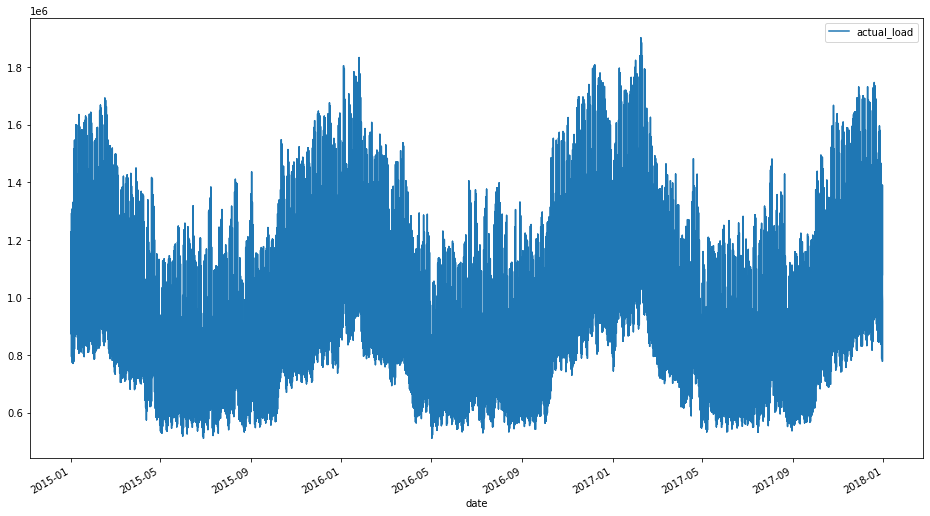

In [ ]:
data_concat.plot(y='actual_load')

Создадим dataseries для отображения суточных данных. Возьмем суммарное потребление и среднюю температуру

In [ ]:
load_df = data_concat['actual_load'].resample('D').sum()
temp_df = data_concat['temperature'].resample('D').mean()

Электроэнергия

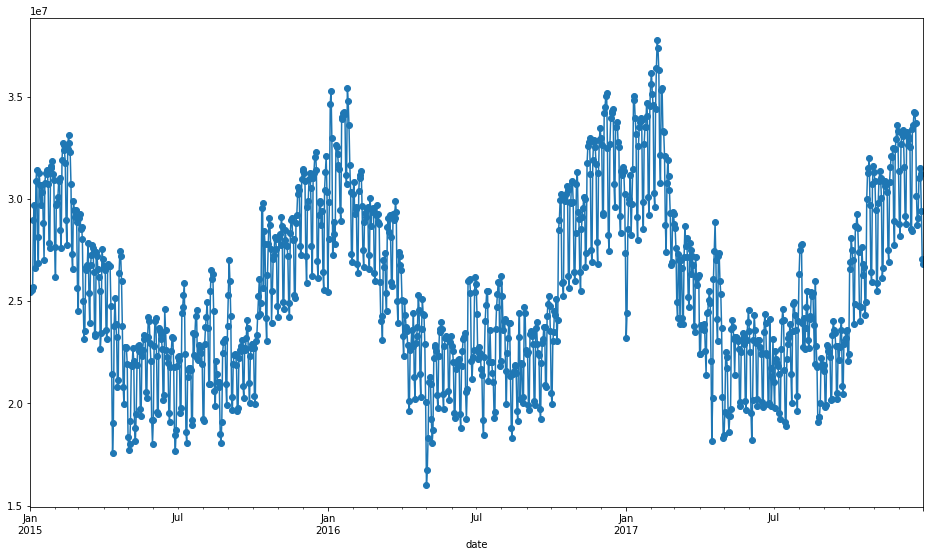

In [ ]:
load_df.plot(marker='o')

Температура

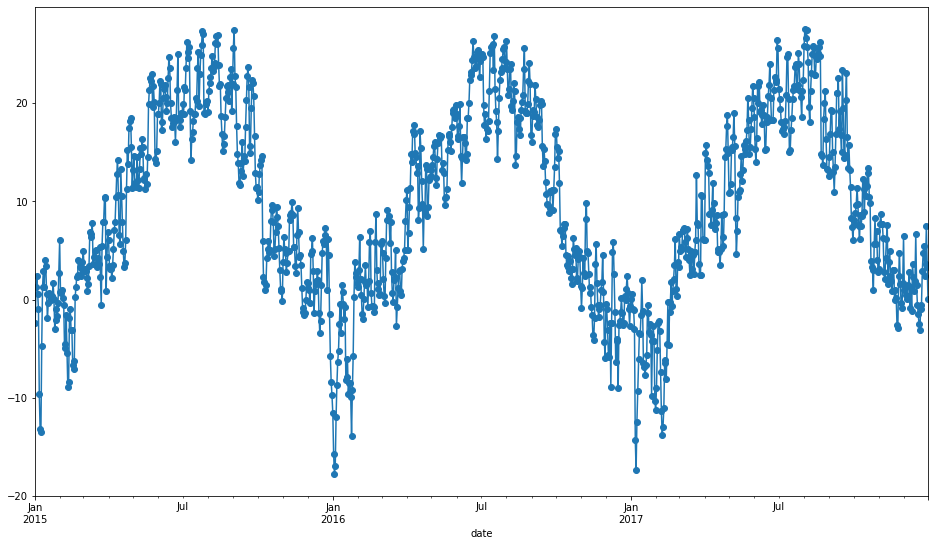

In [ ]:
temp_df.plot(marker='o')

Для демонстрации зависимости потребления от температуры изобразим оба показателя на одном графике

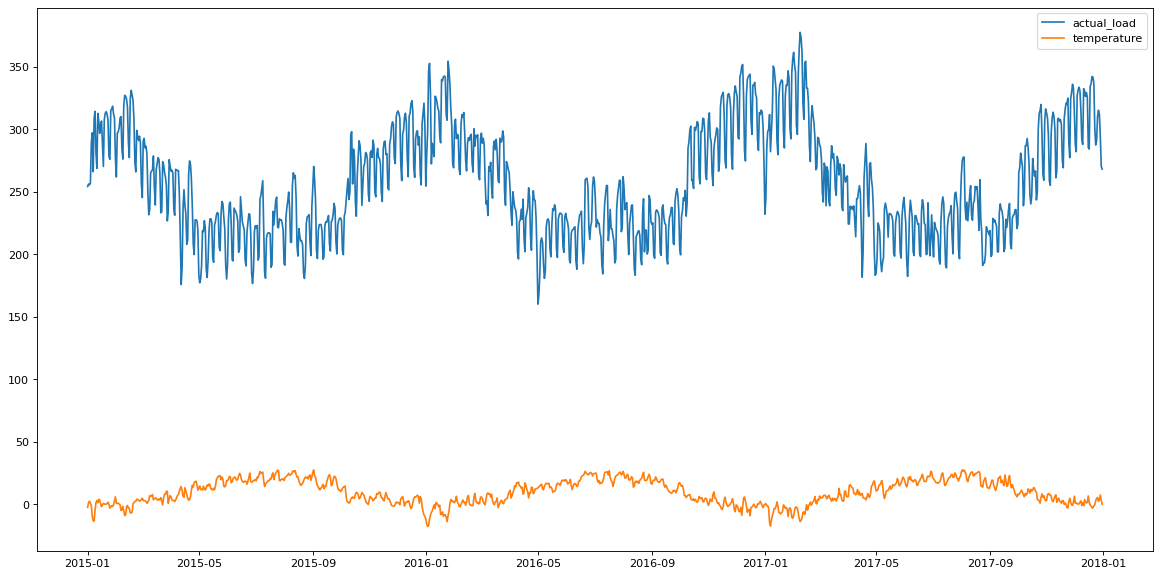

In [ ]:

figure(num=None, figsize=(18,9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(load_df/1e5, label='actual_load')
plt.plot(temp_df, label='temperature')
plt.legend()
plt.show()

Существенная отрицательная корреляция. В холодные дни потребление выше, в теплые - ниже

In [ ]:
corrmat = load_df.corr(temp_df)
corrmat

-0.7684741470381486

Декомпозиция. Временные ряды демонстрируют очевидную сезонность, а также промежуток положительного тренда - потребление электроэнергии в 2016 году вырасло

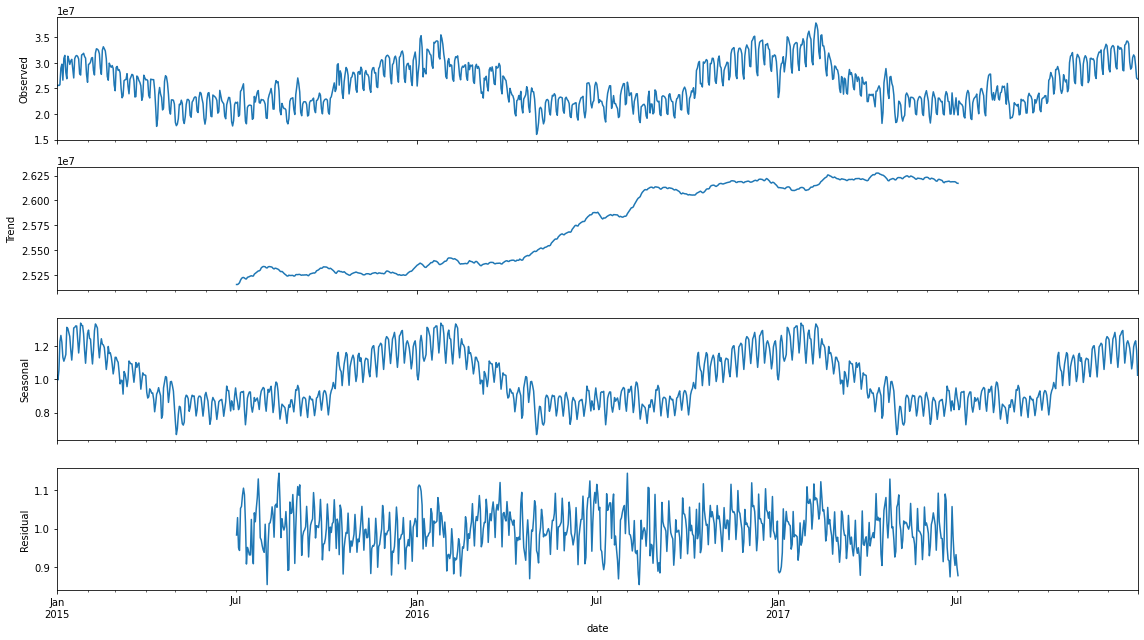

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(load_df, freq=365, model="multiplicative")

fig = res.plot()
plt.show()

Тест на стационарность ADF (хотя стационарность можно исключить уже исходя из вышеприведенных графиков)

In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

def stationarity_test(ts):
    print('Результаты теста Дики-Фуллера:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used',
                                'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

stationarity_test(load_df)

Результаты теста Дики-Фуллера:
Test Statistic                   -2.308245
p-value                           0.169322
#Lags Used                       21.000000
Number of Observations Used    1074.000000
Critical Value (1%)              -3.436453
Critical Value (5%)              -2.864235
Critical Value (10%)             -2.568205
dtype: float64


p-value значительно превышает 5%, следовательно, мы не можем отбросить нулевую гипотезу о том, что временные ряды не стационарны

Feature engineering. Прогноз будет строиться не для временных рядов, а для табличных переменных. Из колонки с датой мы извлекаем день недели, год, месяц, число, бинарную фичу, указывающую, является ли день выходным, а также квартал. Ранее также использовались переменные, указывающие на день/ночь и номер недели в году.

In [ ]:
from datetime import datetime

days_off = ['01-01', '01-07', '03-08', '05-01', '05-09', '06-28', '08-24',
            '10-14', '12-25']

day_off_list = []

data_concat['weekday'] = [datetime.weekday(dat) for dat in data_concat.index]
data_concat['year'] = [dat.year for dat in data_concat.index]
data_concat['month'] = [dat.month for dat in data_concat.index]
data_concat['day'] = [dat.day for dat in data_concat.index]
data_concat['weekend'] = [1 if x in [5,6] else 0 for x in data_concat.weekday]
#data_concat['night'] = [1 if x in [22,23,24,0,1,2,3,4] else 0 for x in data_concat.HE]
data_concat['week'] = [dat.week for dat in data_concat.index]
data_concat['quarter'] = [dat.quarter for dat in data_concat.index]

dates_weekends = []

for date, weekend in zip(list(data_concat.index.astype('str')), list(data_concat.weekend)):
  if any(x in date for x in days_off):
    if weekend==0:
      day_off_list.append(1)
    else:
      day_off_list.append(0)
      if date not in dates_weekends: dates_weekends.append(date)
  else:
    day_off_list.append(0)

data_concat['day_off'] = day_off_list

from datetime import timedelta

for date in dates_weekends:
  if data_concat.loc[data_concat.index==date].weekday[0] == 5:
    data_concat.loc[data_concat.index==pd.to_datetime(date)+timedelta(2), 'day_off']= 1 
  else:
    data_concat.loc[data_concat.index==pd.to_datetime(date)+timedelta(1), 'day_off'] = 1 


In [ ]:
#data_concat.loc[(data_concat.month==04 or data_concat.month==04)&(data_concat.day>)&(data_concat.weekday==6), 'day_off']


In [ ]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2015-01-01 to 2017-12-31
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HE           26304 non-null  int64  
 1   actual_load  26304 non-null  float64
 2   temperature  26304 non-null  int64  
 3   weekday      26304 non-null  int64  
 4   year         26304 non-null  int64  
 5   month        26304 non-null  int64  
 6   day          26304 non-null  int64  
 7   weekend      26304 non-null  int64  
 8   week         26304 non-null  int64  
 9   quarter      26304 non-null  int64  
 10  day_off      26304 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.4 MB


Тепловая карта корреляций. Как видно, сильнее всего потребление зависит от часа в сутках (вечером выше), температуры (в холодное время выше) и дня недели (в рабочие дни выше). Впрочем, коэффициент корреляции даже для этих величин не превышает 0.6. Из-за небольших временных периодов корреляции получаются размазанными. Напомним, в суточном масштабе зависимость между температурой и потреблением выражена в 2.5 раза сильнее.

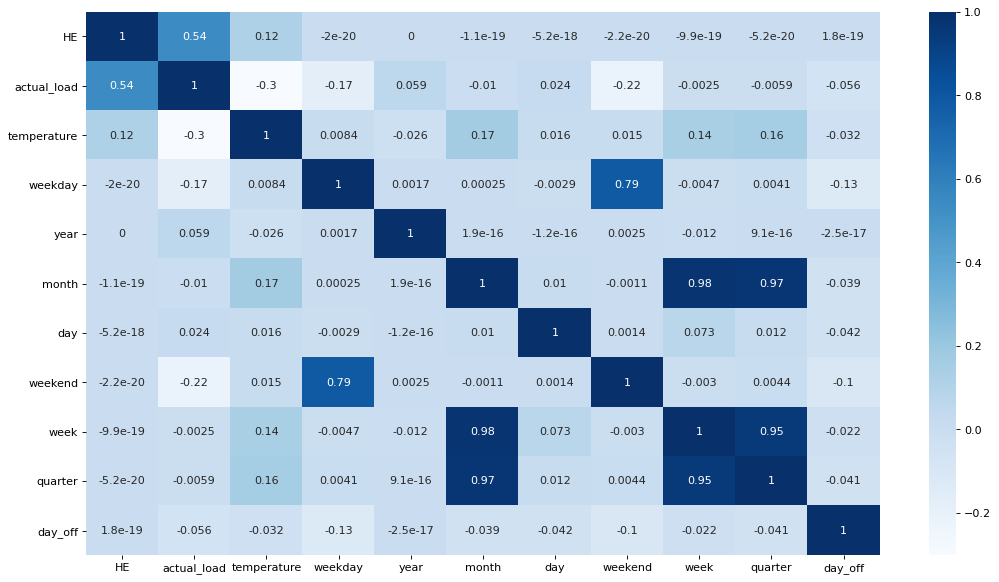

In [ ]:
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(data_concat.corr(), annot=True, cmap="Blues")

Для обучения были выбраны данные до 01.04.2017, т.е. до даты начала самого широкого интервала для прогноза в задании. Также не использовались данные после окончания этого интервала, т.е., после 30.09.2017. Их включение в тренировочный датасет снижает ошибку на ~2%.

Прогноз осуществлялся по часам для периода с 01.04.2017 по 30.09.2017, затем части прогноза использовались для выполнения каждого из заданий - прогнозов по часам, по дням, по месяцам. Эспериментально полученные таким образом результаты оказались немного лучше, чем при прогнозе на основании данных, сначала ресемплированных по дням и по месяцам.

In [ ]:
data_concat.iloc[19704] # индекс начала тестового сета

HE                  1.0
actual_load    852589.0
temperature        -1.0
weekday             5.0
year             2017.0
month               4.0
day                 1.0
weekend             1.0
week               13.0
quarter             2.0
day_off             0.0
Name: 2017-04-01 00:00:00, dtype: float64

In [ ]:
y = np.array(data_concat.actual_load).reshape(-1,1)
X = data_concat.drop('actual_load', axis=1)

def log_y(y): # логарифмирование целевой переменной слегка нормализирует ее
  y = np.log1p(y)
  y_train, y_test = y[:19704], y[19704:24096]
  return y, y_train, y_test

def exp_y(y): # возвращаем исходное значение потребления
  y = np.expm1(y)
  y_train, y_test = y[:19704], y[19704:24096]
  return y, y_train, y_test

In [ ]:
X_train, X_test = X[:19704], X[19704:24096]
#X_train, y_train = pd.concat([X[:19704], X[24096:]]), np.concatenate((y[:19704], y[24096:]))

In [ ]:
y, y_train, y_test = log_y(y)
#X_test, y_test = X[19704:24096], y[19704:24096]

In [ ]:
from lightgbm import LGBMRegressor
import xgboost as xgb

# MAPE
def mape(y_true, y_pred):
   return np.mean(np.abs((y_true.reshape(-1,1) - \
                          y_pred.reshape(-1,1)) / (y_true.reshape(-1,1))))*100

# деривативы первого и второго порядка, чтобы использовать MAPE как objective function в XGBoost
def mape_of(y_true, y_pred):
    grad = (y_pred - y_true) / (0.2 + y_true * np.abs(y_pred - y_true))
    hess = 0.1 + np.zeros(len(y_pred));
    return grad, hess

Для прогноза были выбраны три модели: XGBoost, LGBM и нейронная сеть ConvNet. Первые две обучались на табличных переменных, нейронная сеть использовала только окна временных рядов, без фич.

XGBoost

In [ ]:
xgboost = xgb.XGBRegressor(learning_rate=0.025, n_estimators=1000, n_jobs=-1, seed=42)
#использование дефолтной squared error в качестве функции потерь дает лучшие результаты, чем mape

#model = xgb.XGBRegressor(n_estimators=1000, objective=mape_of)

In [ ]:
xgboost.fit(X_train, y_train)
pred_xgb = np.expm1(xgboost.predict(X_test))

y, y_train, y_test = exp_y(y)

general_mape_xgb = mape(y_test, pred_xgb)
print(f'MAPE XGB на весь период:\n{round(general_mape_xgb,2)}%')

[17:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAPE XGB на весь период:
4.49%


Используем медиану в качестве наивного прогноза

In [ ]:
baseline = np.median(y_train)
print(f'Медиана на весь период:\n{baseline}')

Медиана на весь период:
1082977.5000000005


In [ ]:
baseline_mape = mape(y_test, np.array([baseline]*len(y_test)))
print(f'MAPE для наивного прогноза на весь период:\n{round(baseline_mape,2)}%')

MAPE для наивного прогноза на весь период:
27.68%


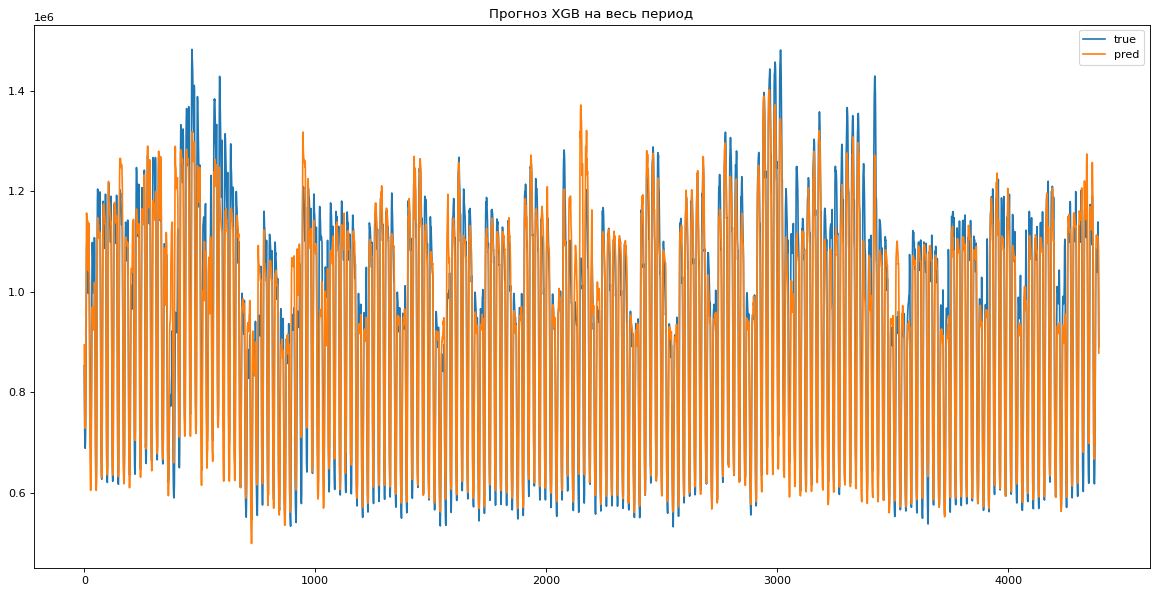

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(y_test)), y_test, label='true')
plt.plot(range(len(y_test)), pred_xgb.astype('int64'), label='pred')
plt.title('Прогноз XGB на весь период')
plt.legend()
plt.show()

In [ ]:
loss_history_xgb = np.abs((np.array(y_test).reshape(-1,1) - np.array(pred_xgb).reshape(-1,1)) / 
                (np.array(y_test).reshape(-1,1)))*100

In [ ]:
loss_history_df = pd.DataFrame({})
loss_history_df['date'] = data_concat.index[19704:24096]
loss_history_df['temperature'] = np.array(data_concat.temperature[19704:24096])
loss_history_df['HE'] = np.array(data_concat.HE[19704:24096])
loss_history_df['weekday'] = [datetime.weekday(dat) for dat in loss_history_df.date]
loss_history_df['year'] = [dat.year for dat in loss_history_df.date]
loss_history_df['month'] = [dat.month for dat in loss_history_df.date]
loss_history_df['day'] = [dat.day for dat in loss_history_df.date]
loss_history_df['weekend'] = [1 if x in [5,6] else 0 for x in loss_history_df.weekday]
loss_history_df['night'] = [1 if x in [22,23,24,0,1,2,3,4] else 0 for x in loss_history_df.HE]
loss_history_df['week'] = [dat.week for dat in loss_history_df.date]
loss_history_df['quarter'] = [dat.quarter for dat in loss_history_df.date]
loss_history_df['actual_load'] = np.array(data_concat.actual_load[19704:24096])
loss_history_df['prediction_xgb'] = pred_xgb
loss_history_df['loss_xgb'] = loss_history_xgb

Отсортируем датасет по спаданию ошибки. У модели проблемы с предсказанием значений за середину апреля 2017г.

In [ ]:
loss_history_df.sort_values('loss_xgb', ascending=False)[[c for c in loss_history_df.columns if c in [col for col in data_concat.columns] + ['prediction_xgb', 'loss_xgb']]].head(50)

temperature  HE  weekday  ...  actual_load  prediction_xgb   loss_xgb
391             2   8        0  ...     678987.0    9.862416e+05  45.251916
392             3   9        0  ...     773362.0    1.121985e+06  45.078857
393             4  10        0  ...     873150.0    1.238266e+06  41.815968
376             8  17        6  ...     776636.0    1.079384e+06  38.981968
377             7  18        6  ...     804863.0    1.105714e+06  37.379094
378             7  19        6  ...     821480.0    1.124190e+06  36.849345
394             5  11        0  ...     942393.0    1.289200e+06  36.800703
375             9  16        6  ...     772585.0    1.052692e+06  36.255833
379             6  20        6  ...     835707.0    1.127991e+06  34.974414
751             7   8        1  ...     655742.0    8.801779e+05  34.226256
397             8  14        0  ...     940986.0    1.243278e+06  32.125079
390             2   7        0  ...     616266.0    8.127314e+05  31.879963
400             9  17        0  ...     918761.0    1.207149e+06  31.388794
399             9  16        0  ...     918581.0    1.204969e+06  31.177259
396             7  13        0  ...     952350.0    1.246599e+06  30.897175
401             9  18        0  ...     926128.0    1.210984e+06  30.757735
398             9  15        0  ...     927447.0    1.212187e+06  30.701471
395             6  12        0  ...     959063.0    1.252702e+06  30.617306
752             9   9        1  ...     758946.0    9.899714e+05  30.440292
920             7   9        1  ...     751135.0    9.726817e+05  29.494923
2148           31  13        3  ...    1056460.0    1.358641e+06  28.603130
2149           32  14        3  ...    1066769.0    1.371488e+06  28.564689
402             9  19        0  ...     942722.0    1.207276e+06  28.062740
2150           32  15        3  ...    1066113.0    1.364078e+06  27.948714
919             7   8        1  ...     648865.0    8.250594e+05  27.154242
753            10  10        1  ...     861925.0    1.091842e+06  26.674812
2151           32  16        3  ...    1061093.0    1.343852e+06  26.647923
2146           29  11        3  ...    1041437.0    1.318186e+06  26.573811
2152           32  17        3  ...    1057097.0    1.337291e+06  26.505999
1567           21   8        0  ...     661925.0    8.335185e+05  25.923405
750             6   7        1  ...     586645.0    7.372601e+05  25.673981
921             8  10        1  ...     860058.0    1.080096e+06  25.584030
374            11  15        6  ...     772932.0    9.703654e+05  25.543434
2145           27  10        3  ...     980310.0    1.227335e+06  25.198623
2156           29  21        3  ...    1005415.0    1.254767e+06  24.800916
2153           31  18        3  ...    1046399.0    1.302248e+06  24.450413
3511           14   8        4  ...     665827.0    8.280935e+05  24.370670
403             8  20        0  ...     987556.0    1.226796e+06  24.225487
2154           31  19        3  ...    1035866.0    1.281403e+06  23.703561
380             6  21        6  ...     904354.0    1.118590e+06  23.689451
895            16   8        0  ...     660604.0    8.166511e+05  23.621886
2147           30  12        3  ...    1058376.0    1.306866e+06  23.478424
381             5  22        6  ...     922331.0    1.138436e+06  23.430282
1568           21   9        0  ...     769048.0    9.487415e+05  23.365707
940             1   5        2  ...     578366.0    7.107817e+05  22.894791
373            12  14        6  ...     776938.0    9.540184e+05  22.792086
3512           16   9        4  ...     768774.0    9.418172e+05  22.508980
382             4  23        6  ...     866961.0    1.060481e+06  22.321664
2157           28  22        3  ...    1013119.0    1.238291e+06  22.225610
939             2   4        2  ...     581588.0    7.103263e+05  22.135655

[50 rows x 12 columns]

Как видим, в этом месте наблюдается аномально низкое потребление в сравнении с предыдущими периодами, к которому модель была не готова.

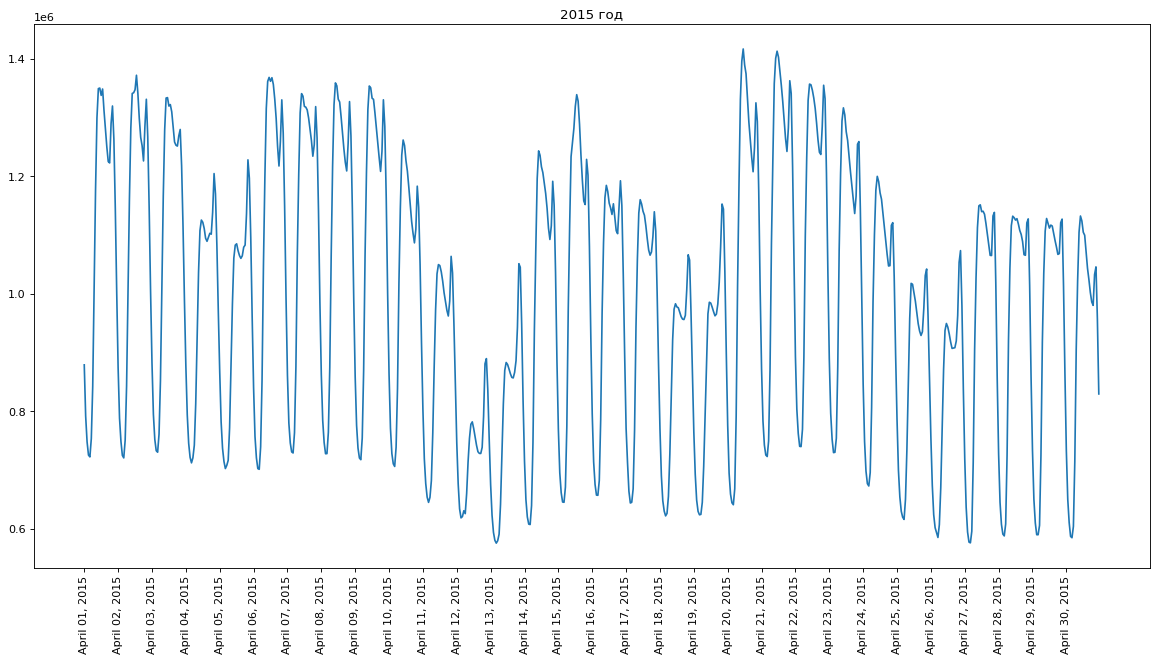

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(data_concat.iloc[2160:2880])), 
         data_concat.loc[(data_concat.index>'2015-03-31')&(data_concat.index<'2015-05-01')].actual_load)
my_xticks = np.array(data_concat.index[2160:2880].strftime('%B %d, %Y'))
plt.xticks(range(len(data_concat.iloc[2160:2880]))[::24], my_xticks[::24], rotation=90)
plt.title('2015 год')
plt.show()

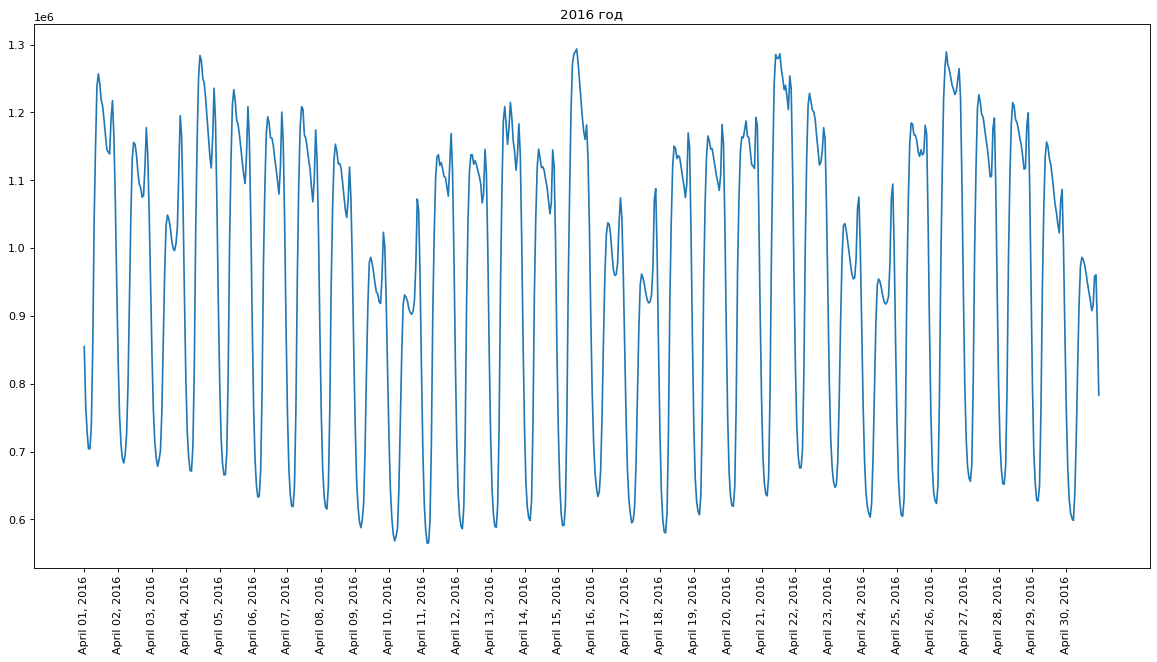

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(data_concat.iloc[10944:11664])), 
         data_concat.loc[(data_concat.index>'2016-03-31')&(data_concat.index<'2016-05-01')].actual_load)
my_xticks = np.array(data_concat.index[10944:11664].strftime('%B %d, %Y'))
plt.xticks(range(len(data_concat.iloc[10944:11664]))[::24], my_xticks[::24], rotation=90)
plt.title('2016 год')
plt.show()

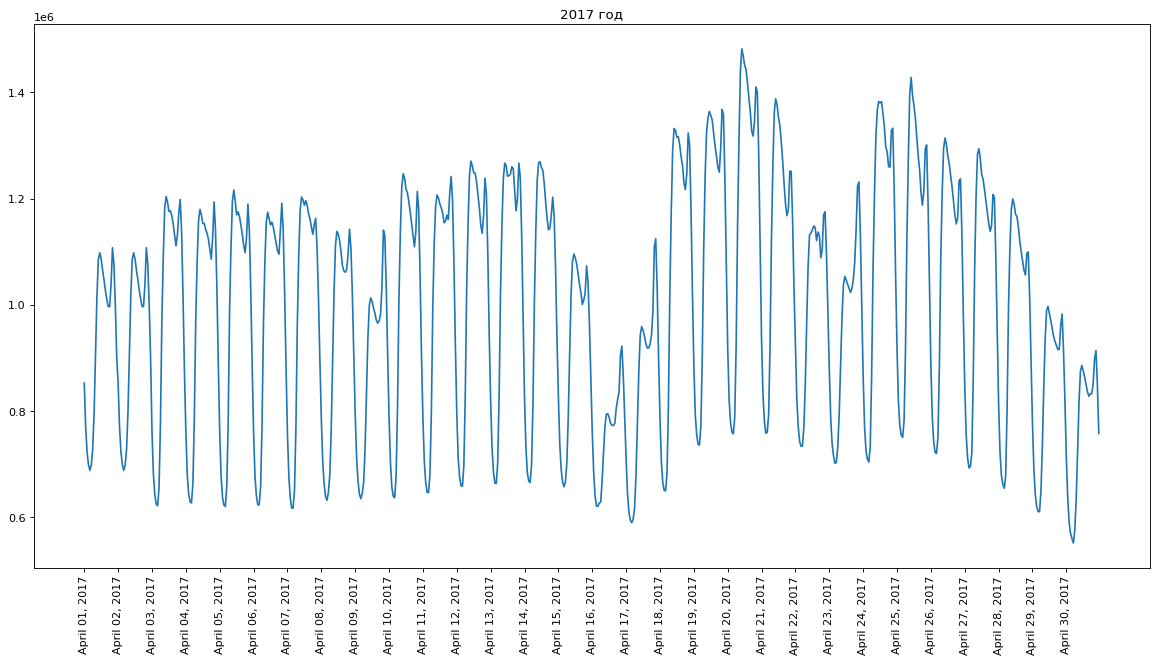

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(data_concat.iloc[19704:20424])), 
         data_concat.loc[(data_concat.index>'2017-03-31')&(data_concat.index<'2017-05-01')].actual_load)
my_xticks = np.array(data_concat.index[19704:20424].strftime('%B %d, %Y'))
plt.xticks(range(len(data_concat.iloc[19704:20424]))[::24], my_xticks[::24], rotation=90)
plt.title('2017 год')
plt.show()

In [ ]:
data_concat['pred_xgb'] = np.nan
data_concat['baseline'] = np.nan
data_concat['pred_xgb'].iloc[19704:24096] = pred_xgb.astype('int64')
data_concat['baseline'].iloc[19704:24096] = np.array([baseline]*(24096-19704))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
hourly_true = data_concat.iloc[20040:20208].actual_load
hourly_pred_xgb = data_concat.iloc[20040:20208].pred_xgb
hourly_baseline = data_concat.iloc[20040:20208].baseline

In [ ]:
hourly_mape_xgb = mape(np.array(hourly_true), np.array(hourly_pred_xgb))
print(f'MAPE XGB почасовой прогноз 15.04.2017 - 22.04.2017:\n{round(hourly_mape_xgb,2)}%')

MAPE XGB почасовой прогноз 15.04.2017 - 22.04.2017:
10.1%


In [ ]:
baseline_hourly = mape(np.array(hourly_true), np.array(hourly_baseline))
print(f'MAPE для наивного почасового прогноза 15.04.2017 - 22.04.2017:\n{round(baseline_hourly,2)}%')

MAPE для наивного почасового прогноза 15.04.2017 - 22.04.2017:
27.24%


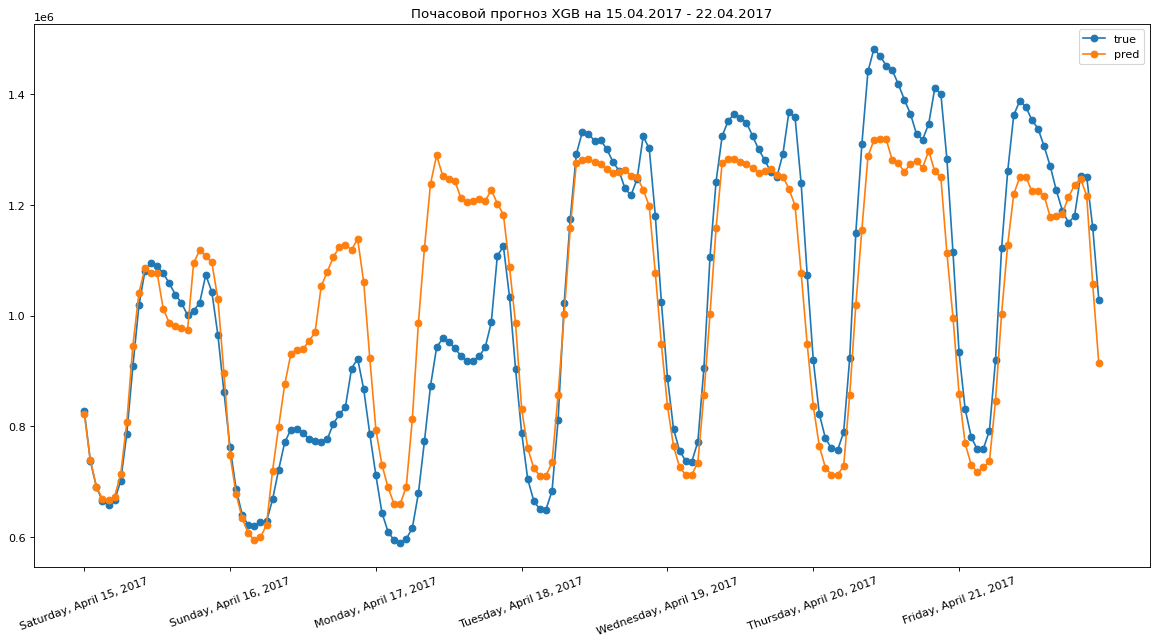

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(hourly_true)), hourly_true, label='true', marker='o')
plt.plot(range(len(hourly_true)), hourly_pred_xgb, label='pred', marker='o')
my_xticks = np.array(data_concat.index[20040:20208].strftime('%A, %B %d, %Y'))
plt.xticks(range(len(hourly_true))[::24], my_xticks[::24], rotation=20)
plt.title('Почасовой прогноз XGB на 15.04.2017 - 22.04.2017')
plt.legend()
plt.show()

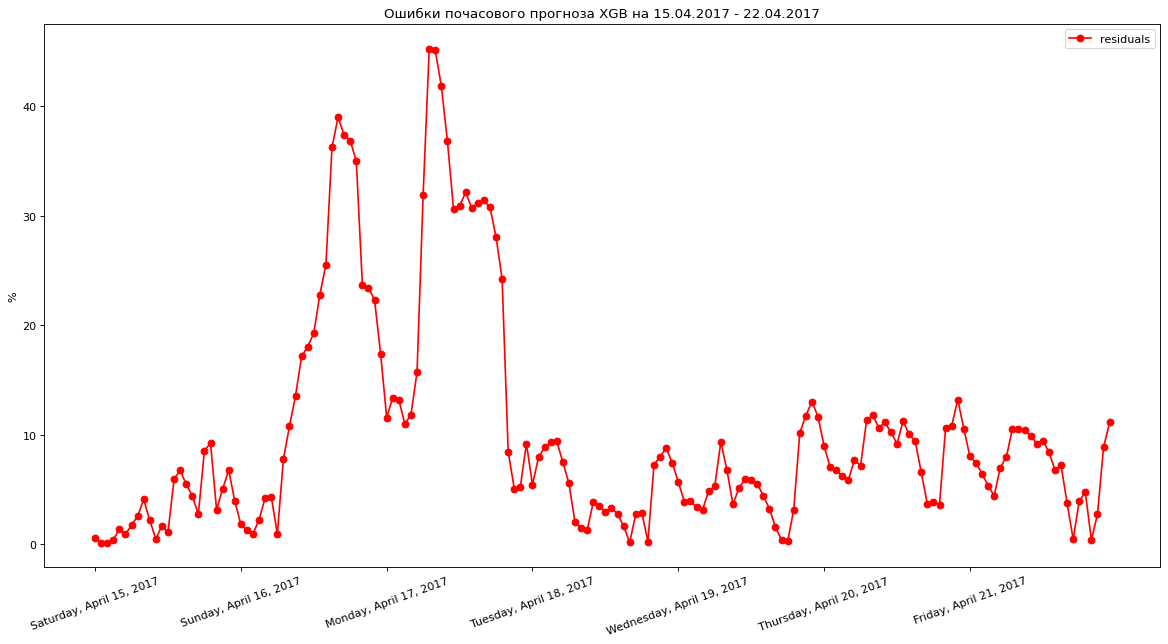

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(hourly_true)), 
         np.abs((np.array(hourly_true).reshape(-1,1) - np.array(hourly_pred_xgb).reshape(-1,1)) / 
                (np.array(hourly_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
my_xticks = np.array(data_concat.index[20040:20208].strftime('%A, %B %d, %Y'))
plt.xticks(range(len(hourly_true))[::24], my_xticks[::24], rotation=20)
plt.ylabel('%')
plt.title('Ошибки почасового прогноза XGB на 15.04.2017 - 22.04.2017')
plt.legend()
plt.show()

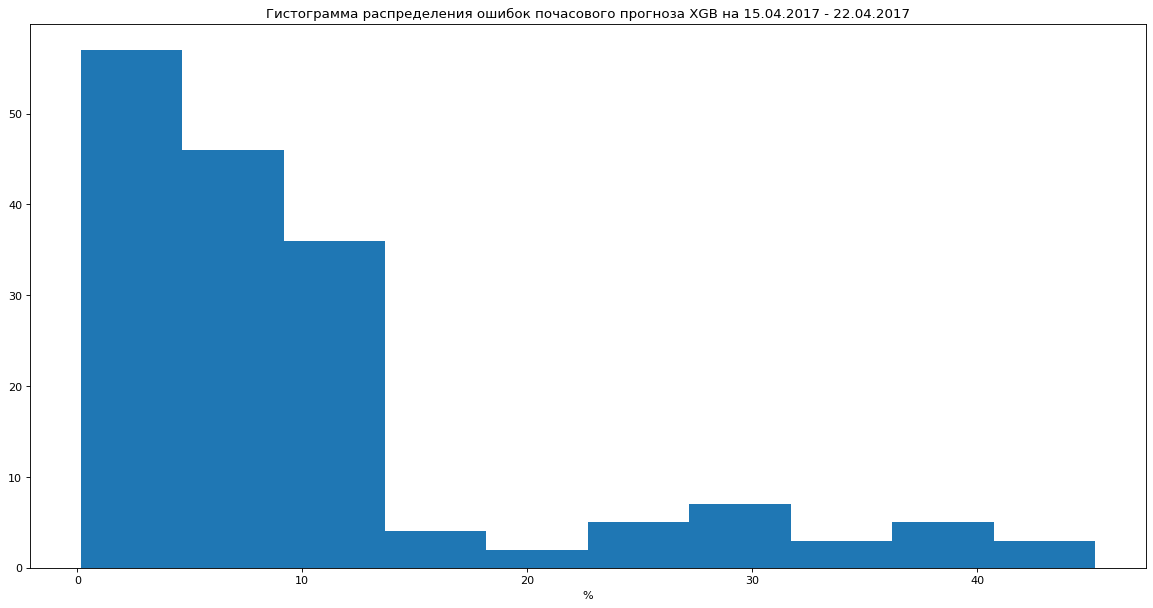

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(hourly_true).reshape(-1,1) - np.array(hourly_pred_xgb).reshape(-1,1)) / (np.array(hourly_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок почасового прогноза XGB на 15.04.2017 - 22.04.2017')
plt.xlabel('%')
plt.show()

In [ ]:
load_and_pred = data_concat[['actual_load', 'pred_xgb', 'baseline']].groupby(data_concat.index).sum()
daily = load_and_pred.loc[(load_and_pred.index>'14.04.2017')&(load_and_pred.index<'16.05.2017')]
daily

actual_load    pred_xgb    baseline
date                                           
2017-04-15   22096431.0  22280225.0  25991460.0
2017-04-16   18164351.0  21341484.0  25991460.0
2017-04-17   20273768.0  25142803.0  25991460.0
2017-04-18   26100616.0  25875019.0  25991460.0
2017-04-19   27428797.0  25903722.0  25991460.0
2017-04-20   28865316.0  26303800.0  25991460.0
2017-04-21   27004298.0  25327626.0  25991460.0
2017-04-22   24109462.0  21554437.0  25991460.0
2017-04-23   23027875.0  22150095.0  25991460.0
2017-04-24   27205292.0  25259823.0  25991460.0
2017-04-25   27334675.0  24397528.0  25991460.0
2017-04-26   25971179.0  23421597.0  25991460.0
2017-04-27   25361030.0  23540117.0  25991460.0
2017-04-28   23692435.0  23184251.0  25991460.0
2017-04-29   20305803.0  20453521.0  25991460.0
2017-04-30   18324556.0  19902434.0  25991460.0
2017-05-01   18459202.0  18115526.0  25991460.0
2017-05-02   19602279.0  21892336.0  25991460.0
2017-05-03   22501834.0  21885909.0  25991460.0
2017-05-04   22291268.0  21458709.0  25991460.0
2017-05-05   21752017.0  21105066.0  25991460.0
2017-05-06   19445475.0  18685370.0  25991460.0
2017-05-07   18608617.0  18598993.0  25991460.0
2017-05-08   19368930.0  21535065.0  25991460.0
2017-05-09   19724892.0  21909193.0  25991460.0
2017-05-10   23646381.0  25954410.0  25991460.0
2017-05-11   24094364.0  24259605.0  25991460.0
2017-05-12   23723766.0  22858664.0  25991460.0
2017-05-13   23138825.0  20085873.0  25991460.0
2017-05-14   21370229.0  19866394.0  25991460.0
2017-05-15   23244068.0  22386721.0  25991460.0

In [ ]:
daily_true = daily['actual_load']
daily_pred_xgb = daily['pred_xgb']
daily_baseline = daily['baseline']

In [ ]:
daily_mape_xgb = mape(np.array(daily_true), np.array(daily_pred_xgb))
print(f'MAPE XGB ежесуточный прогноз 15.04.2017 - 15.05.2017:\n{round(daily_mape_xgb,2)}%')

MAPE XGB ежесуточный прогноз 15.04.2017 - 15.05.2017:
6.83%


In [ ]:
baseline_daily = mape(np.array(daily_true), np.array(daily_baseline))
print(f'MAPE для наивного ежесуточного прогноза 15.04.2017 - 15.05.2017:\n{round(baseline_daily,2)}%')

MAPE для наивного ежесуточного прогноза 15.04.2017 - 15.05.2017:
18.0%


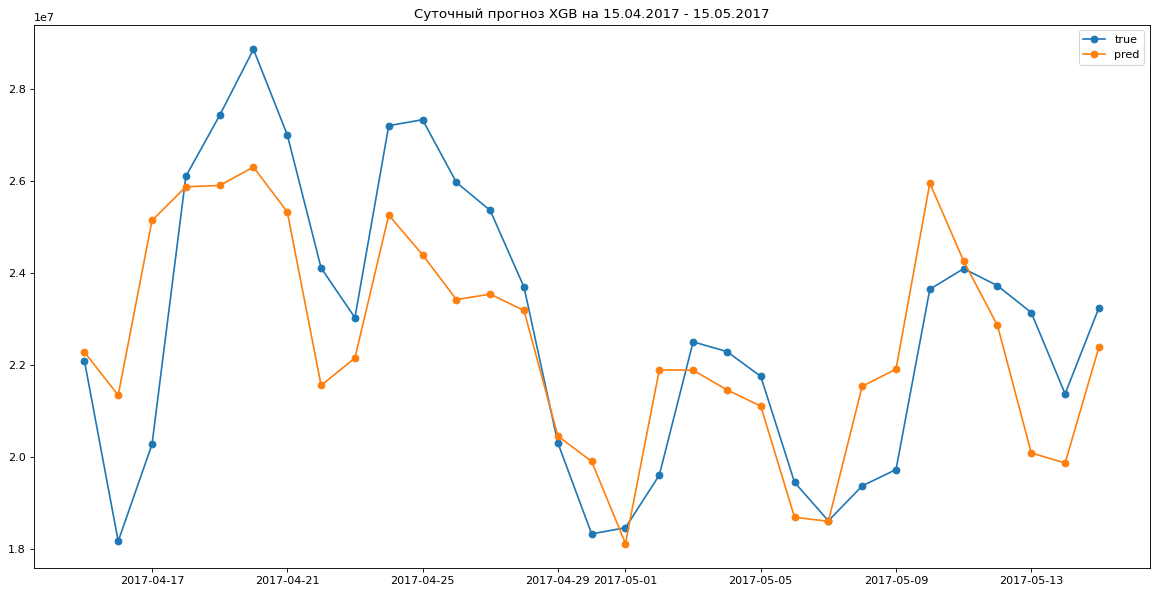

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(daily.index, np.array(daily_true), label='true', marker='o')
plt.plot(daily.index, np.array(np.array(daily_pred_xgb), dtype=int), label='pred', marker='o')
plt.title('Суточный прогноз XGB на 15.04.2017 - 15.05.2017')
plt.legend()
plt.show()

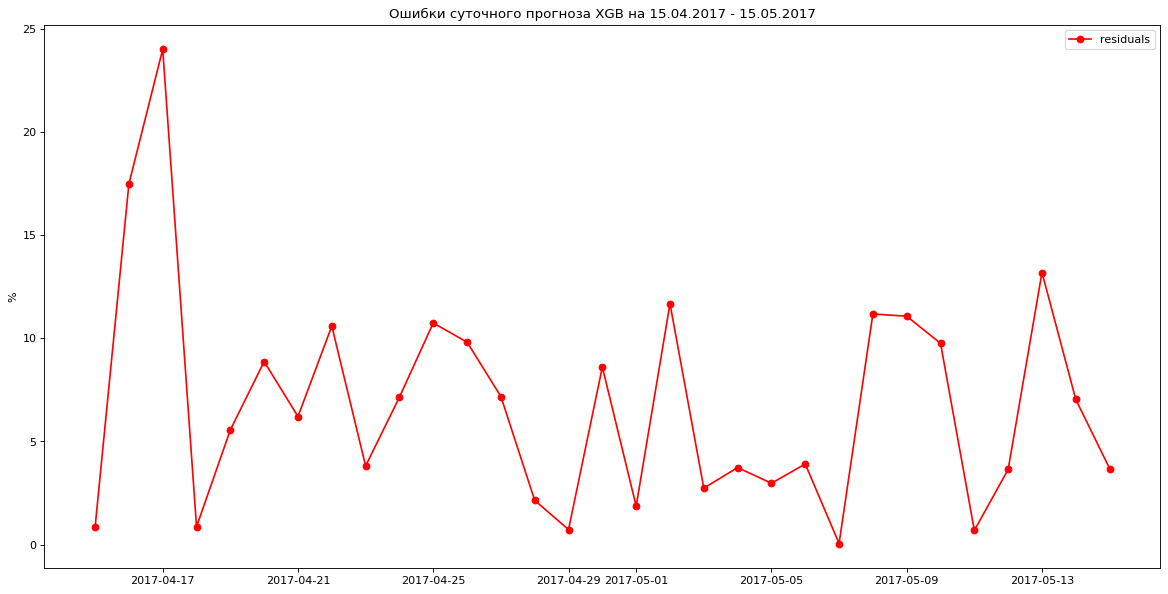

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(daily.index, 
         np.abs((np.array(daily_true).reshape(-1,1) - np.array(daily_pred_xgb).reshape(-1,1)) / 
                (np.array(daily_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
plt.title('Ошибки суточного прогноза XGB на 15.04.2017 - 15.05.2017')
plt.ylabel('%')
plt.legend()
plt.show()

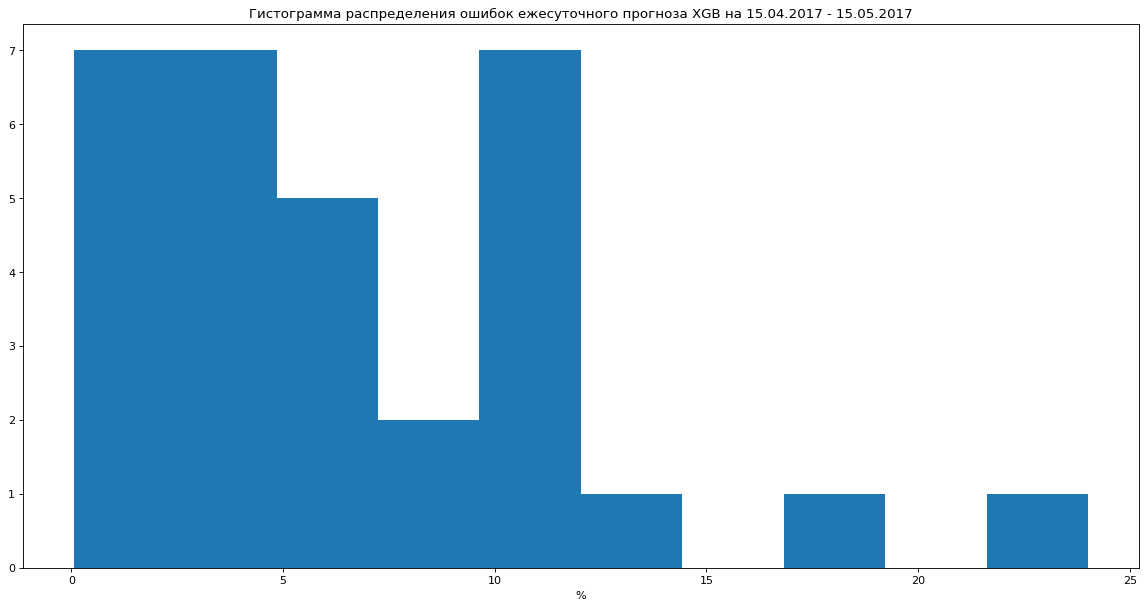

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(daily_true).reshape(-1,1) - np.array(daily_pred_xgb).reshape(-1,1)) / (np.array(daily_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок ежесуточного прогноза XGB на 15.04.2017 - 15.05.2017')
plt.xlabel('%')
plt.show()

In [ ]:
load_and_pred_month = data_concat[['actual_load', 'pred_xgb', 'baseline']].resample('M').sum()
monthly = load_and_pred_month.loc[(load_and_pred_month.index>'2017-03-31')&(load_and_pred_month.index<'2017-10-31')]
monthly

actual_load     pred_xgb     baseline
date                                             
2017-04-30  717191722.0  707057192.0  779743800.0
2017-05-31  679718224.0  677153692.0  805735260.0
2017-06-30  658500570.0  663672952.0  779743800.0
2017-07-31  686991813.0  685518065.0  805735260.0
2017-08-31  728606783.0  700382734.0  805735260.0
2017-09-30  668009325.0  659390683.0  779743800.0

In [ ]:
monthly_true = monthly.actual_load
monthly_pred_xgb = monthly.pred_xgb
monthly_baseline = monthly.baseline

monthly_mape_xgb = mape(np.array(monthly_true), np.array(monthly_pred_xgb))
print(f'MAPE XGB ежемесячный прогноз 15.04.2017 - 15.05.2017:\n{round(monthly_mape_xgb,2)}%')

MAPE XGB ежемесячный прогноз 15.04.2017 - 15.05.2017:
1.33%


In [ ]:
baseline_monthly = mape(np.array(monthly_true), np.array(monthly_baseline))
print(f'MAPE для наивного ежемесячного прогноза 15.04.2017 - 15.05.2017:\n{round(baseline_monthly,2)}%')

MAPE для наивного ежемесячного прогноза 15.04.2017 - 15.05.2017:
15.05%


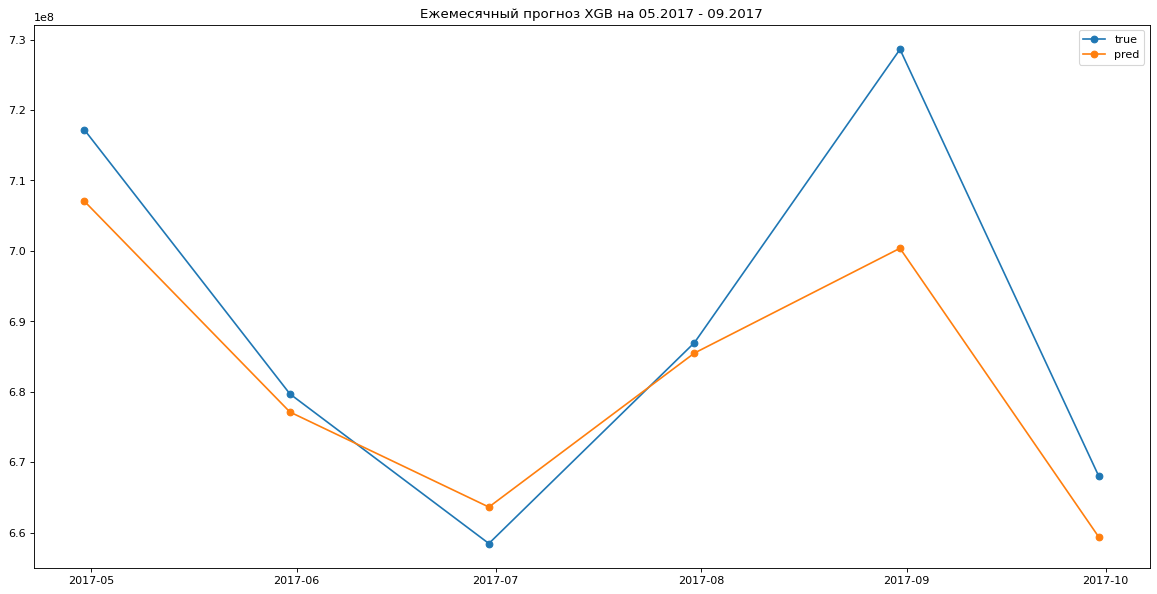

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(monthly.index,monthly_true, label='true', marker='o')
plt.plot(monthly.index,monthly_pred_xgb, label='pred', marker='o')
plt.title('Ежемесячный прогноз XGB на 05.2017 - 09.2017')
plt.legend()
plt.show()

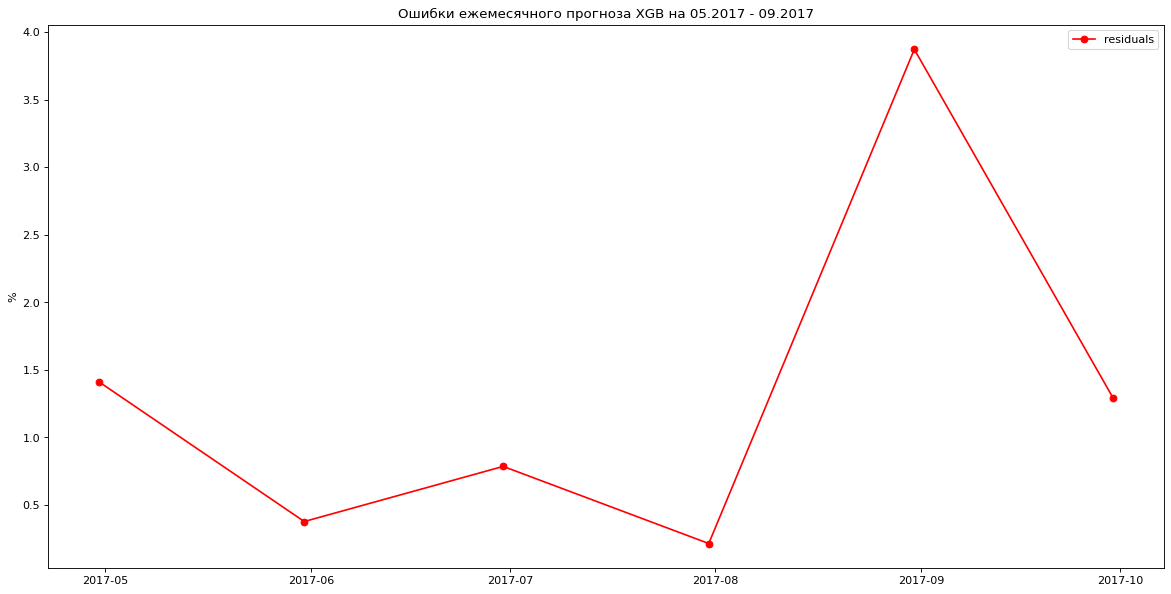

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(monthly.index, 
         np.abs((np.array(monthly_true).reshape(-1,1) - np.array(monthly_pred_xgb).reshape(-1,1)) / 
                (np.array(monthly_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
plt.title('Ошибки ежемесячного прогноза XGB на 05.2017 - 09.2017')
plt.ylabel('%')
plt.legend()
plt.show()

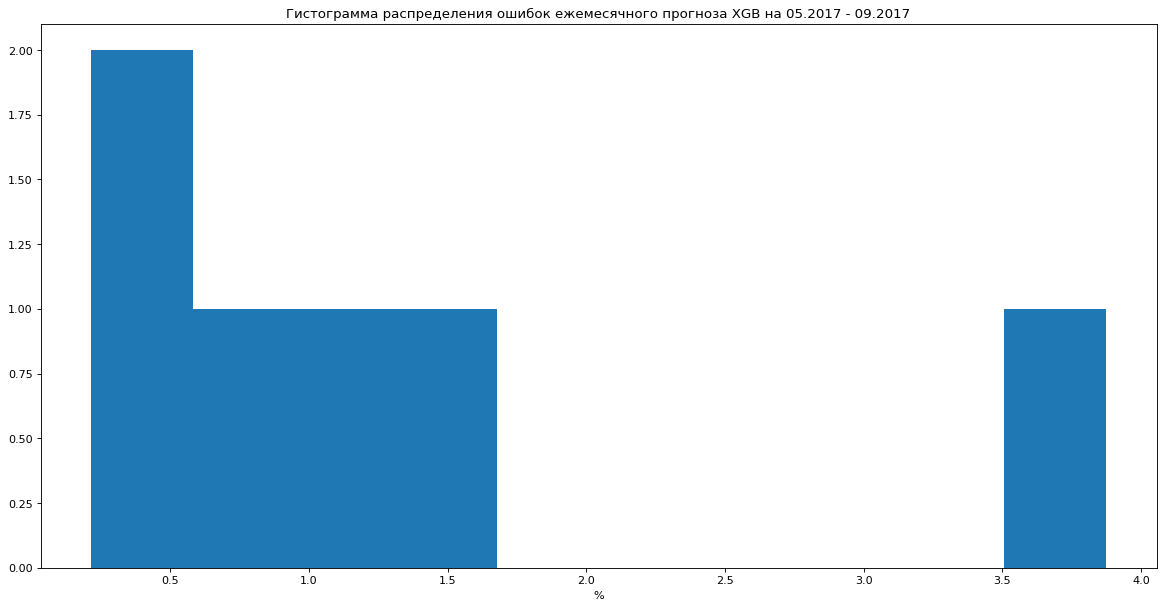

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(monthly_true).reshape(-1,1) - np.array(monthly_pred_xgb).reshape(-1,1)) / (np.array(monthly_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок ежемесячного прогноза XGB на 05.2017 - 09.2017')
plt.xlabel('%')
plt.show()

LightGBM

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(learning_rate=0.025, n_estimators=1000, n_jobs=-1,
                     objective='mape')

y, y_train, y_test = log_y(y)

lgbm.fit(X_train, y_train.reshape(-1,))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.025, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective='mape',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pred_lgbm = np.expm1(lgbm.predict(X_test))

y, y_train, y_test = exp_y(y)

general_mape_lgbm = mape(y_test, pred_lgbm)
print(f'MAPE LGMB на весь период:\n{round(general_mape_lgbm,2)}%')

MAPE LGMB на весь период:
4.12%


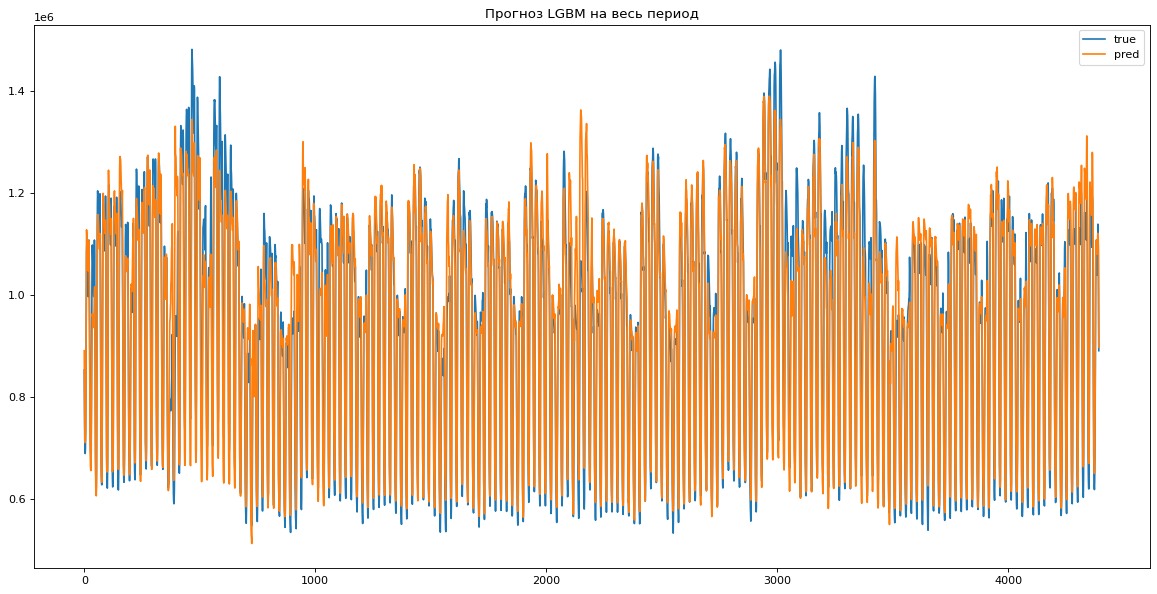

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(y_test)), y_test, label='true')
plt.plot(range(len(y_test)), pred_lgbm.astype('int64'), label='pred')
plt.title('Прогноз LGBM на весь период')
plt.legend()
plt.show()

In [ ]:
loss_history_lgbm = np.abs((np.array(y_test).reshape(-1,1) - np.array(pred_lgbm).reshape(-1,1)) / 
                (np.array(y_test).reshape(-1,1)))*100
loss_history_df['prediction_lgbm'] = pred_lgbm
loss_history_df['loss_lgbm'] = loss_history_lgbm

Примерно тот же тип ошибок, что и у XGB.

In [ ]:
loss_history_df.sort_values('loss_lgbm', ascending=False)[[c for c in loss_history_df.columns if c in [col for col in data_concat.columns] + ['prediction_lgbm', 'loss_lgbm']]].head(50)

temperature  HE  weekday  ...  actual_load  prediction_lgbm  loss_lgbm
391             2   8        0  ...     678987.0     1.045714e+06  54.010957
392             3   9        0  ...     773362.0     1.168415e+06  51.082548
393             4  10        0  ...     873150.0     1.292152e+06  47.987457
394             5  11        0  ...     942393.0     1.330969e+06  41.232902
397             8  14        0  ...     940986.0     1.269699e+06  34.932816
390             2   7        0  ...     616266.0     8.274858e+05  34.274130
396             7  13        0  ...     952350.0     1.273525e+06  33.724497
398             9  15        0  ...     927447.0     1.236753e+06  33.350291
395             6  12        0  ...     959063.0     1.277667e+06  33.220312
399             9  16        0  ...     918581.0     1.222212e+06  33.054335
376             8  17        6  ...     776636.0     1.030203e+06  32.649367
378             7  19        6  ...     821480.0     1.088047e+06  32.449590
377             7  18        6  ...     804863.0     1.064524e+06  32.261512
375             9  16        6  ...     772585.0     1.020718e+06  32.117204
1567           21   8        0  ...     661925.0     8.719593e+05  31.730828
400             9  17        0  ...     918761.0     1.209925e+06  31.690944
752             9   9        1  ...     758946.0     9.986992e+05  31.590290
379             6  20        6  ...     835707.0     1.096883e+06  31.252115
1568           21   9        0  ...     769048.0     1.006633e+06  30.893399
401             9  18        0  ...     926128.0     1.201417e+06  29.724739
895            16   8        0  ...     660604.0     8.504566e+05  28.739242
751             7   8        1  ...     655742.0     8.406743e+05  28.201994
2148           31  13        3  ...    1056460.0     1.352696e+06  28.040452
2149           32  14        3  ...    1066769.0     1.363121e+06  27.780340
2150           32  15        3  ...    1066113.0     1.360758e+06  27.637324
896            18   9        0  ...     768914.0     9.808005e+05  27.556595
2145           27  10        3  ...     980310.0     1.249957e+06  27.506299
2151           32  16        3  ...    1061093.0     1.352875e+06  27.498247
374            11  15        6  ...     772932.0     9.847319e+05  27.402134
2152           32  17        3  ...    1057097.0     1.345349e+06  27.268296
402             9  19        0  ...     942722.0     1.194438e+06  26.700992
1569           23  10        0  ...     875674.0     1.105124e+06  26.202697
920             7   9        1  ...     751135.0     9.463989e+05  25.995842
373            12  14        6  ...     776938.0     9.759668e+05  25.617073
2146           29  11        3  ...    1041437.0     1.307537e+06  25.551278
2153           31  18        3  ...    1046399.0     1.313249e+06  25.501791
2147           30  12        3  ...    1058376.0     1.326579e+06  25.340948
403             8  20        0  ...     987556.0     1.232528e+06  24.805856
3512           16   9        4  ...     768774.0     9.585832e+05  24.689853
3511           14   8        4  ...     665827.0     8.288084e+05  24.478035
2144           25   9        3  ...     873948.0     1.086529e+06  24.324205
2154           31  19        3  ...    1035866.0     1.283763e+06  23.931394
919             7   8        1  ...     648865.0     8.026813e+05  23.705435
381             5  22        6  ...     922331.0     1.139625e+06  23.559245
2131           27  20        2  ...     934213.0     1.150016e+06  23.099991
2130           28  19        2  ...     939152.0     1.153939e+06  22.870336
2155           30  20        3  ...    1020981.0     1.250763e+06  22.505974
750             6   7        1  ...     586645.0     7.186497e+05  22.501624
753            10  10        1  ...     861925.0     1.055625e+06  22.472979
2156           29  21        3  ...    1005415.0     1.229432e+06  22.281091

[50 rows x 12 columns]

In [ ]:
data_concat['pred_lgbm'] = np.nan
data_concat['pred_lgbm'].iloc[19704:24096] = pred_lgbm.astype('int64')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
hourly_pred_lgbm = data_concat.iloc[20040:20208].pred_lgbm

In [ ]:
hourly_mape_lgbm = mape(np.array(hourly_true), np.array(hourly_pred_lgbm))
print(f'MAPE LGBM почасовой прогноз 15.04.2017 - 22.04.2017:\n{round(hourly_mape_lgbm,2)}%')

MAPE LGBM почасовой прогноз 15.04.2017 - 22.04.2017:
10.14%


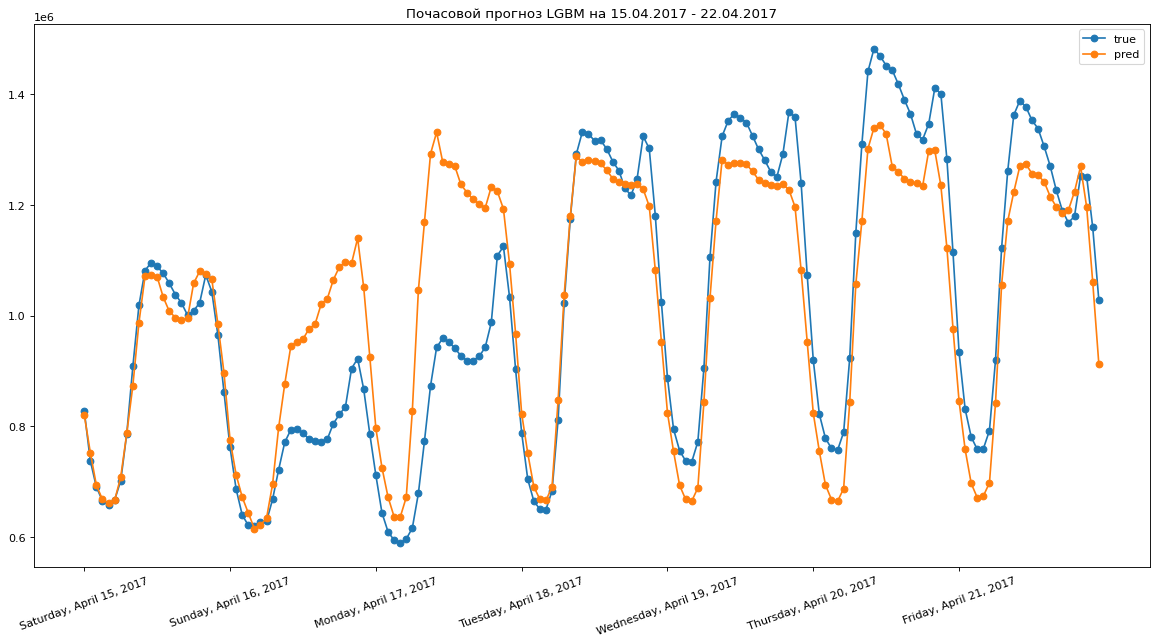

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(hourly_true)), hourly_true, label='true', marker='o')
plt.plot(range(len(hourly_true)), hourly_pred_lgbm, label='pred', marker='o')
my_xticks = np.array(data_concat.index[20040:20208].strftime('%A, %B %d, %Y'))
plt.xticks(range(len(hourly_true))[::24], my_xticks[::24], rotation=20)
plt.title('Почасовой прогноз LGBM на 15.04.2017 - 22.04.2017')
plt.legend()
plt.show()

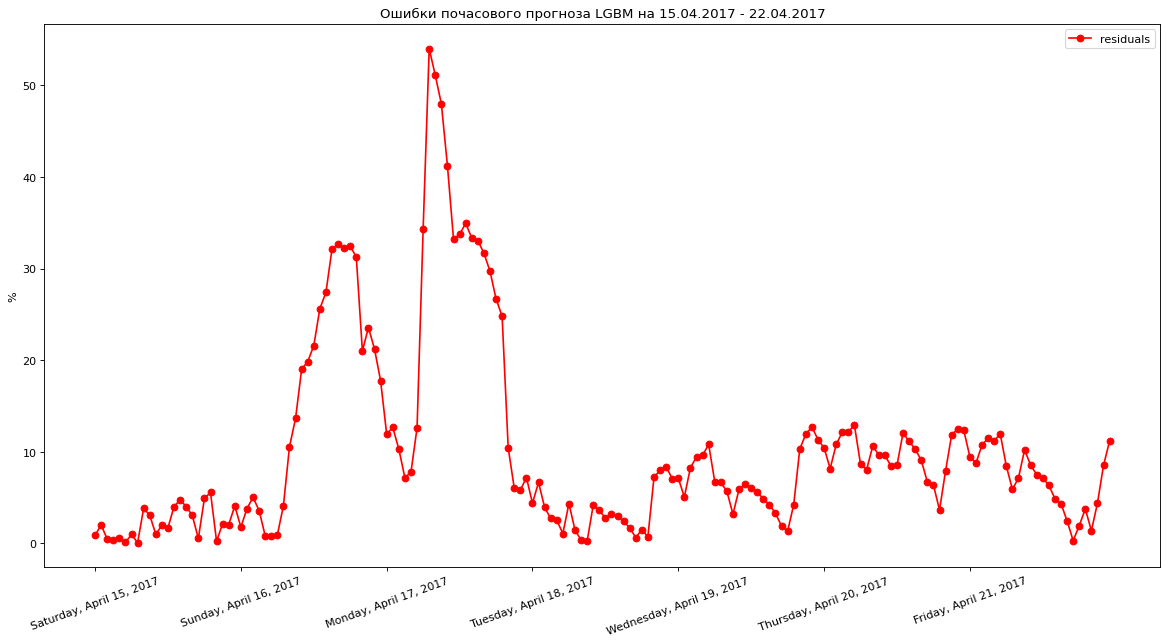

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(hourly_true)), 
         np.abs((np.array(hourly_true).reshape(-1,1) - np.array(hourly_pred_lgbm).reshape(-1,1)) / 
                (np.array(hourly_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
my_xticks = np.array(data_concat.index[20040:20208].strftime('%A, %B %d, %Y'))
plt.xticks(range(len(hourly_true))[::24], my_xticks[::24], rotation=20)
plt.ylabel('%')
plt.title('Ошибки почасового прогноза LGBM на 15.04.2017 - 22.04.2017')
plt.legend()
plt.show()

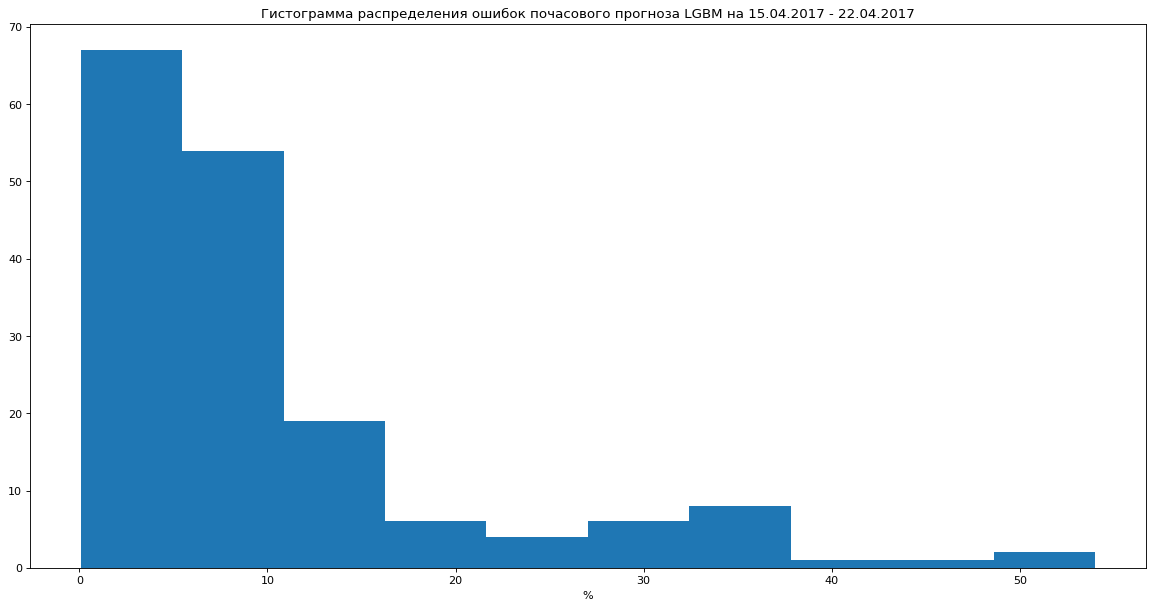

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(hourly_true).reshape(-1,1) - np.array(hourly_pred_lgbm).reshape(-1,1)) / (np.array(hourly_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок почасового прогноза LGBM на 15.04.2017 - 22.04.2017')
plt.xlabel('%')
plt.show()

In [ ]:
load_and_pred = data_concat[['actual_load', 'pred_lgbm', 'baseline']].groupby(data_concat.index).sum()
daily = load_and_pred.loc[(load_and_pred.index>'14.04.2017')&(load_and_pred.index<'16.05.2017')]

In [ ]:
daily_pred_lgbm = daily['pred_lgbm']

In [ ]:
daily_mape_lgbm = mape(np.array(daily_true), np.array(daily_pred_lgbm))
print(f'MAPE LGBM ежесуточный прогноз 15.04.2017 - 15.05.2017:\n{round(daily_mape_lgbm,2)}%')

MAPE LGBM ежесуточный прогноз 15.04.2017 - 15.05.2017:
6.15%


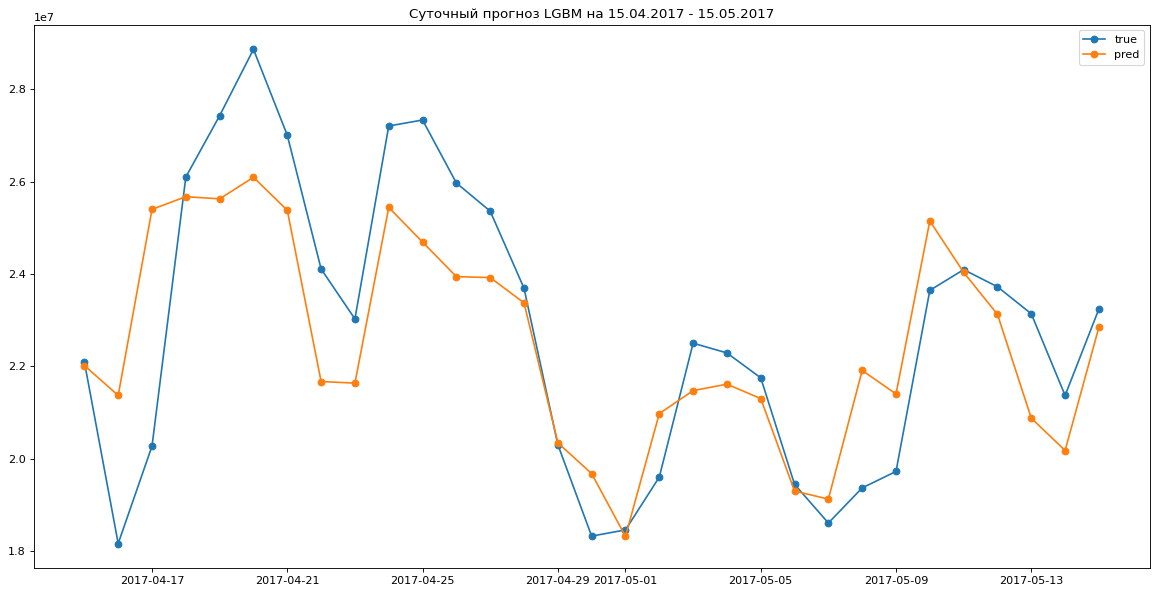

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(daily.index, np.array(daily_true), label='true', marker='o')
plt.plot(daily.index, np.array(np.array(daily_pred_lgbm), dtype=int), label='pred', marker='o')
plt.title('Суточный прогноз LGBM на 15.04.2017 - 15.05.2017')
plt.legend()
plt.show()

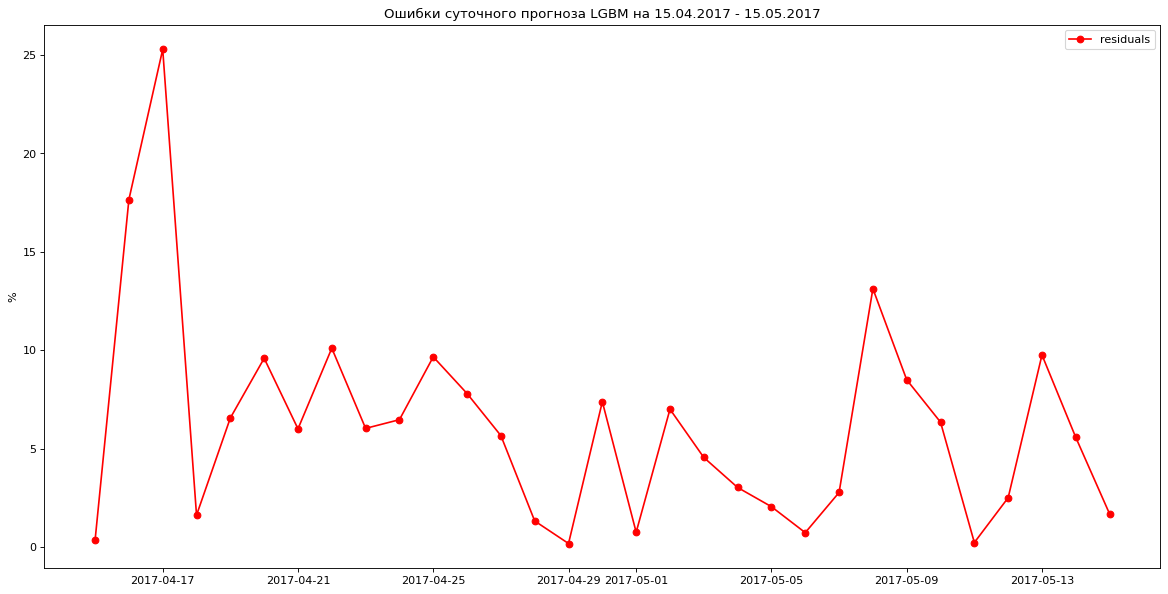

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(daily.index, 
         np.abs((np.array(daily_true).reshape(-1,1) - np.array(daily_pred_lgbm).reshape(-1,1)) / 
                (np.array(daily_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
plt.title('Ошибки суточного прогноза LGBM на 15.04.2017 - 15.05.2017')
plt.ylabel('%')
plt.legend()
plt.show()

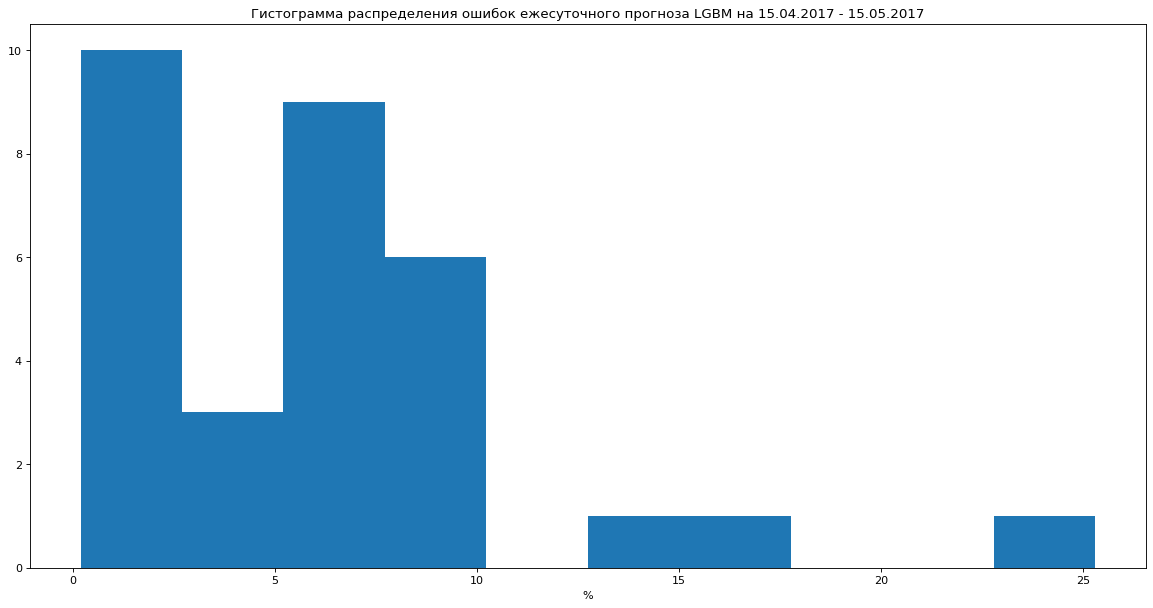

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(daily_true).reshape(-1,1) - np.array(daily_pred_lgbm).reshape(-1,1)) / (np.array(daily_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок ежесуточного прогноза LGBM на 15.04.2017 - 15.05.2017')
plt.xlabel('%')
plt.show()

In [ ]:
load_and_pred_month = data_concat[['actual_load', 'pred_lgbm', 'baseline']].resample('M').sum()
monthly = load_and_pred_month.loc[(load_and_pred_month.index>'2017-03-31')&(load_and_pred_month.index<'2017-10-31')]
monthly

actual_load    pred_lgbm     baseline
date                                             
2017-04-30  717191722.0  707435679.0  779743800.0
2017-05-31  679718224.0  683425759.0  805735260.0
2017-06-30  658500570.0  672149909.0  779743800.0
2017-07-31  686991813.0  691493920.0  805735260.0
2017-08-31  728606783.0  707808204.0  805735260.0
2017-09-30  668009325.0  678598119.0  779743800.0

In [ ]:
monthly_pred_lgbm = monthly.pred_lgbm
monthly_mape_lgbm = mape(np.array(monthly_true), np.array(monthly_pred_lgbm))
print(f'MAPE LGBM ежемесячный прогноз 15.04.2017 - 15.05.2017:\n{round(monthly_mape_lgbm,2)}%')

MAPE LGBM ежемесячный прогноз 15.04.2017 - 15.05.2017:
1.51%


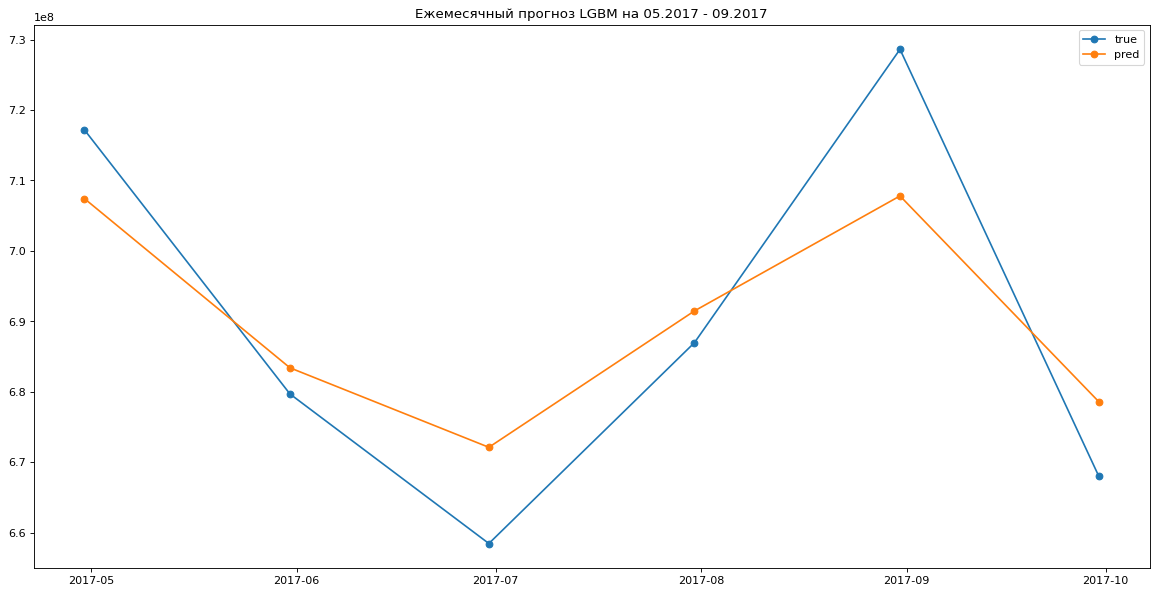

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(monthly.index,monthly_true, label='true', marker='o')
plt.plot(monthly.index,monthly_pred_lgbm, label='pred', marker='o')
plt.title('Ежемесячный прогноз LGBM на 05.2017 - 09.2017')
plt.legend()
plt.show()

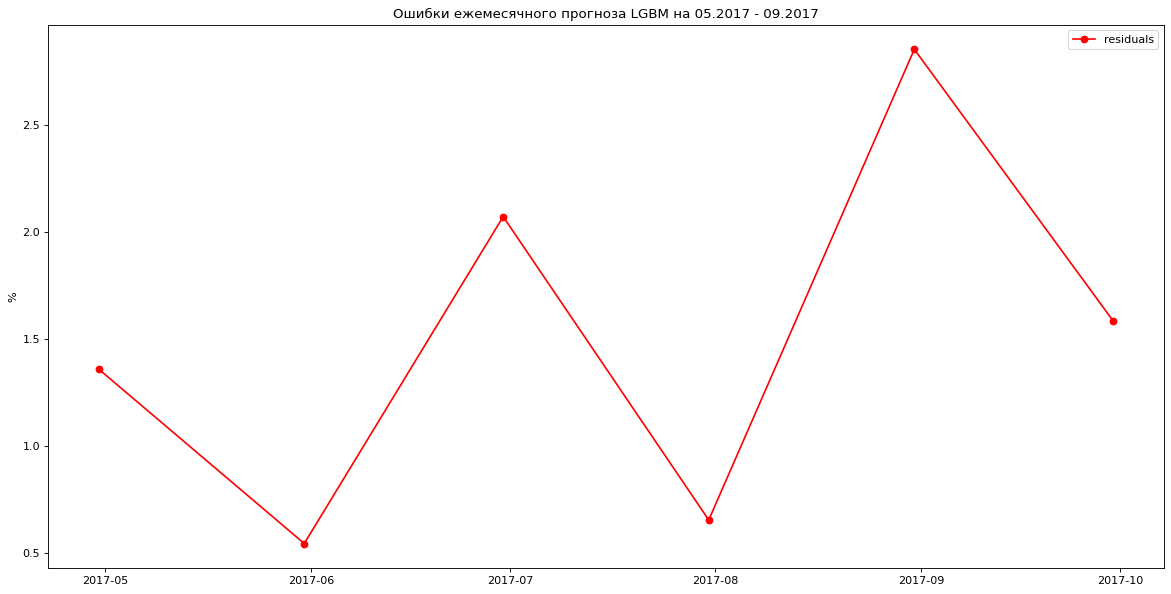

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(monthly.index, 
         np.abs((np.array(monthly_true).reshape(-1,1) - np.array(monthly_pred_lgbm).reshape(-1,1)) / 
                (np.array(monthly_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
plt.title('Ошибки ежемесячного прогноза LGBM на 05.2017 - 09.2017')
plt.ylabel('%')
plt.legend()
plt.show()

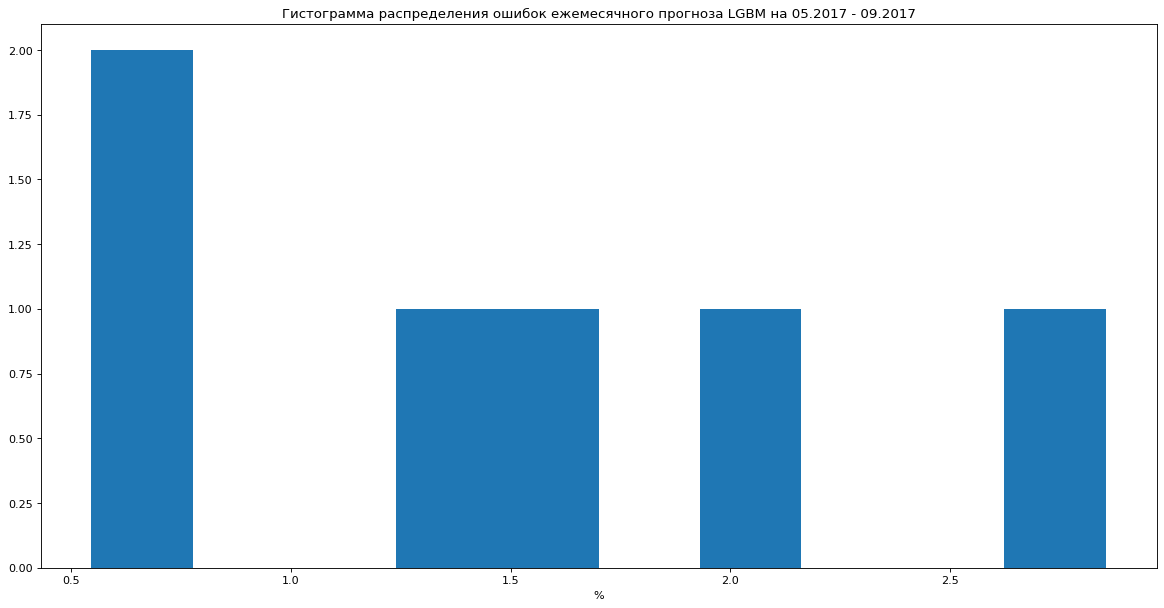

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(monthly_true).reshape(-1,1) - np.array(monthly_pred_lgbm).reshape(-1,1)) / (np.array(monthly_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок ежемесячного прогноза LGBM на 05.2017 - 09.2017')
plt.xlabel('%')
plt.show()

ConvNet

Для прогноза временных рядов использовалась 1-D CNN. Данные потребления были разбиты на окна по 15 часов, целевым значением выступал уровень потребления за 16-ый час. Число 15 было подобрано экспериментально для этого задания.

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv1D, Flatten, Dense, MaxPooling1D

In [ ]:
y_test = y[19704:24096] # исходные целевые значения потребления

In [ ]:
window = 15 # окно в 15 часов

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# последний элемент y_train - 8 час 04.03.2017
# ему передуют 15 часов из X_train
X_train, y_train = split_sequence(y[:19040], window)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

X_val, y_val = split_sequence(y[19040:19689], window)
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# первый y_test_ отвечает 19704 индексу (первому часу 01.04.2017)
# ему передуют 15 часов из X_test
X_test, y_test_ = split_sequence(y[19689:24096], window)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test = np.array(X_test, dtype=float)

In [ ]:
X_test.shape

(4392, 15, 1)

In [ ]:
y_test.shape

(4392, 1)

In [ ]:
X_train[-1]

array([[1292655.],
       [1309238.],
       [1376012.],
       [1357603.],
       [1305603.],
       [1233635.],
       [1132016.],
       [1014107.],
       [ 908307.],
       [ 830177.],
       [ 787622.],
       [ 766566.],
       [ 757309.],
       [ 770356.],
       [ 806180.]])

In [ ]:
y_train[-1]

array([892108.])

In [ ]:
data_concat.iloc[19024:19040] # так выглядит последнее тренировочное окно в таблице

HE  actual_load  temperature  ...  pred_xgb  baseline  pred_lgbm
date                                      ...                               
2017-03-03  17    1292655.0            8  ...       NaN       NaN        NaN
2017-03-03  18    1309238.0            6  ...       NaN       NaN        NaN
2017-03-03  19    1376012.0            5  ...       NaN       NaN        NaN
2017-03-03  20    1357603.0            5  ...       NaN       NaN        NaN
2017-03-03  21    1305603.0            5  ...       NaN       NaN        NaN
2017-03-03  22    1233635.0            4  ...       NaN       NaN        NaN
2017-03-03  23    1132016.0            2  ...       NaN       NaN        NaN
2017-03-03  24    1014107.0            2  ...       NaN       NaN        NaN
2017-03-04   1     908307.0            0  ...       NaN       NaN        NaN
2017-03-04   2     830177.0            0  ...       NaN       NaN        NaN
2017-03-04   3     787622.0           -1  ...       NaN       NaN        NaN
2017-03-04   4     766566.0           -2  ...       NaN       NaN        NaN
2017-03-04   5     757309.0           -2  ...       NaN       NaN        NaN
2017-03-04   6     770356.0           -1  ...       NaN       NaN        NaN
2017-03-04   7     806180.0           -3  ...       NaN       NaN        NaN
2017-03-04   8     892108.0            1  ...       NaN       NaN        NaN

[16 rows x 14 columns]

In [ ]:
model = keras.Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(window,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

model.summary()
model.compile(optimizer='adam', loss='mape', metrics=['mape'])

history = model.fit(X_train, y_train, epochs=4, batch_size=4, 
                    validation_data = (X_val, y_val), verbose=1, shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 14, 128)           384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                26910     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 27,325
Trainable params: 27,325
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
4757/4757 [==============================] - 8s 2ms/step - loss: 8.3604 - mape: 8.3604 - val_loss: 2.6724 - 

In [ ]:
pred_conv = model.predict(X_test)
score, general_mape_conv = model.evaluate(X_test, y_test_)

print('Test mape:', general_mape_conv)

138/138 [==============================] - 0s 1ms/step - loss: 3.3846 - mape: 3.3846
Test mape: 3.3846118450164795


In [ ]:
print(f'MAPE ConvNet на весь период:\n{round(general_mape_conv,2)}%')

MAPE ConvNet на весь период:
3.38%


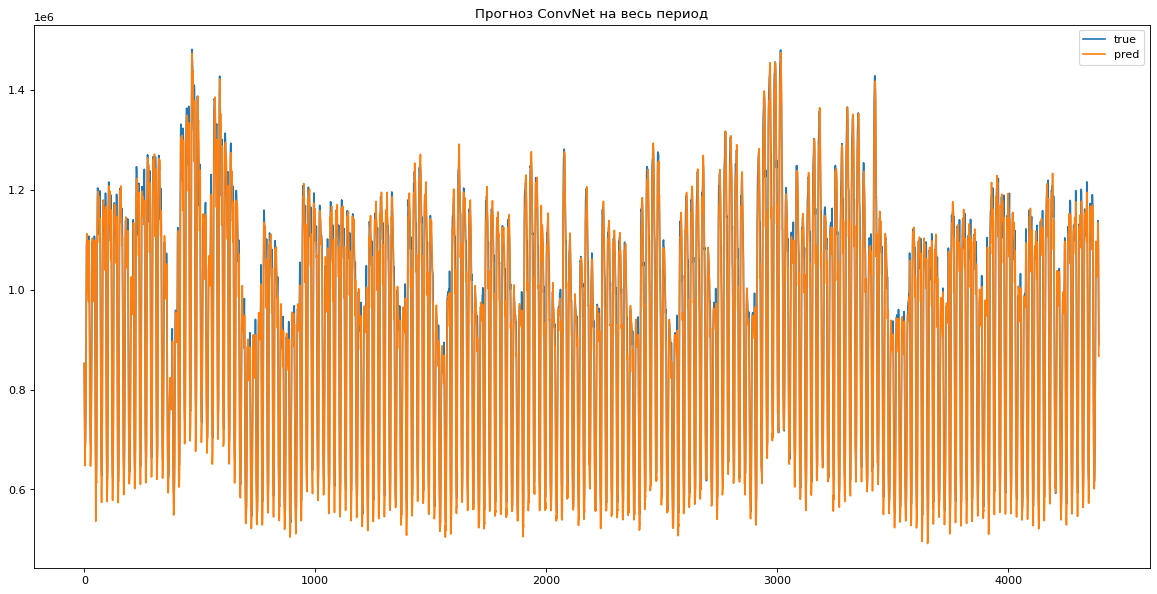

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(y_test)), y_test, label='true')
plt.plot(range(len(y_test)), pred_conv.astype('int64'), label='pred')
plt.title('Прогноз ConvNet на весь период')
plt.legend()
plt.show()

In [ ]:
loss_history_conv = np.abs((np.array(y_test).reshape(-1,1) - np.array(pred_conv).reshape(-1,1)) / 
                (np.array(y_test).reshape(-1,1)))*100
loss_history_df['prediction_conv'] = pred_conv
loss_history_df['loss_conv'] = loss_history_conv

Ошибки Сonvolutional NN при визуальном анализе не имеют четкой структуры - ни хронологически, ни в отношении значений фич. Единственной закономерностью можно считать трудности с предсказнием потребления для 7 часов утра, а также для позднего вечера в теплое время года.

In [ ]:
loss_history_df.sort_values('loss_conv', ascending=False)[[c for c in loss_history_df.columns if c in [col for col in data_concat.columns] + ['prediction_conv', 'loss_conv']]].head(50)

temperature  HE  weekday  ...  actual_load  prediction_conv  loss_conv
50             11   3        0  ...     642021.0     5.364138e+05  16.449189
3242           22   3        0  ...     657032.0     5.567179e+05  15.267769
1902           17   7        0  ...     703380.0     5.967229e+05  15.163514
1734           16   7        0  ...     707941.0     6.027836e+05  14.853974
1398           17   7        0  ...     702782.0     6.021804e+05  14.314761
1586           17   3        1  ...     595329.0     5.107642e+05  14.204719
1590           17   7        1  ...     714601.0     6.175932e+05  13.575093
3626           14   3        2  ...     573360.0     4.959991e+05  13.492548
2238           16   7        0  ...     681608.0     5.902936e+05  13.396905
482             1   3        4  ...     780714.0     6.766076e+05  13.334773
2070           21   7        0  ...     721126.0     6.251916e+05  13.303422
3764           15  21        0  ...    1147152.0     9.946563e+05  13.293416
3692           16  21        4  ...    1065480.0     9.245401e+05  13.227829
2406           16   7        0  ...     669236.0     5.817266e+05  13.076011
2574           14   7        0  ...     668338.0     5.811036e+05  13.052434
3668           13  21        3  ...    1112272.0     9.678640e+05  12.983155
1062           11   7        0  ...     754610.0     6.572596e+05  12.900753
2570           11   3        0  ...     582011.0     5.075034e+05  12.801750
524             9  21        5  ...    1169659.0     1.020514e+06  12.751158
3650            6   3        3  ...     563508.0     4.917330e+05  12.737181
3914           15   3        0  ...     584663.0     5.103075e+05  12.717673
1830           13   7        4  ...     718592.0     6.298896e+05  12.343914
3746           18   3        0  ...     582808.0     5.111468e+05  12.295843
572             5  21        0  ...    1328039.0     1.165448e+06  12.242901
3409           22   2        0  ...     724732.0     6.367848e+05  12.135141
2742           19   7        0  ...     693241.0     6.092954e+05  12.109155
308            11  21        3  ...    1266810.0     1.115030e+06  11.981246
2910           17   7        0  ...     684259.0     6.023860e+05  11.965206
1898           12   3        0  ...     590839.0     5.203797e+05  11.925298
1394           11   3        0  ...     587699.0     5.176211e+05  11.924115
1922           19   3        1  ...     632287.0     5.575877e+05  11.814147
2066           19   3        0  ...     616495.0     5.445899e+05  11.663537
404             7  21        0  ...    1108366.0     9.792309e+05  11.650946
3673           10   2        4  ...     636780.0     5.628909e+05  11.603556
3794           13   3        2  ...     595936.0     5.268912e+05  11.585934
1230           12   7        0  ...     713386.0     6.310266e+05  11.544854
3620           14  21        1  ...    1102674.0     9.757515e+05  11.510428
3578           17   3        0  ...     596379.0     5.278254e+05  11.494976
3836           11  21        3  ...    1141355.0     1.010665e+06  11.450409
1926           21   7        1  ...     736265.0     6.521655e+05  11.422450
2166           21   7        4  ...     705984.0     6.254356e+05  11.409377
942             2   7        2  ...     735061.0     6.513194e+05  11.392464
1899           14   4        0  ...     569827.0     5.050316e+05  11.371061
3074           21   3        0  ...     691310.0     6.127900e+05  11.358146
2829           18  22        3  ...    1082377.0     9.596229e+05  11.341156
1418           18   3        1  ...     617005.0     5.471440e+05  11.322599
1278           17   7        2  ...     740328.0     6.566060e+05  11.308771
1274           16   3        2  ...     612803.0     5.437596e+05  11.266814
2906           16   3        0  ...     604617.0     5.368058e+05  11.215571
2142           22   7        3  ...     636383.0     5.654401e+05  11.147837

[50 rows x 12 columns]

In [ ]:
data_concat['pred_conv'] = np.nan
pred_conv = pred_conv.reshape(-1,)
data_concat['pred_conv'].iloc[19704:24096] = pred_conv.astype('int64')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
hourly_pred_conv = data_concat.iloc[20040:20208].pred_conv

In [ ]:
hourly_mape_conv = mape(np.array(hourly_true), np.array(hourly_pred_conv))
print(f'MAPE ConvNet почасовой прогноз 15.04.2017 - 22.04.2017:\n{round(hourly_mape_conv,2)}%')

MAPE ConvNet почасовой прогноз 15.04.2017 - 22.04.2017:
3.4%


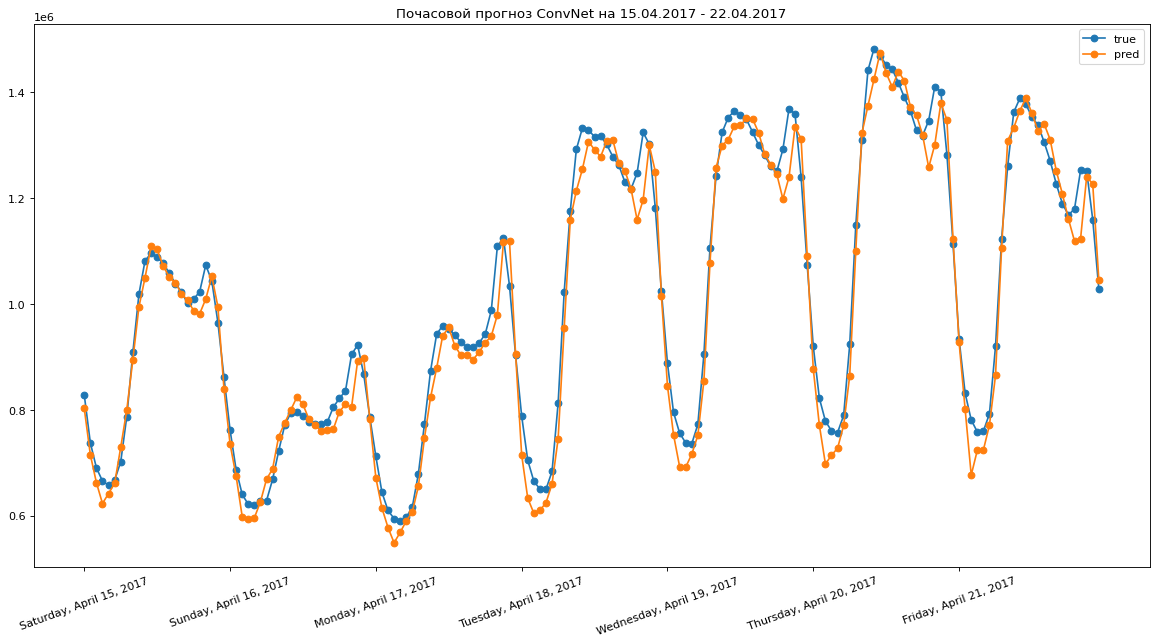

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(hourly_true)), hourly_true, label='true', marker='o')
plt.plot(range(len(hourly_true)), hourly_pred_conv, label='pred', marker='o')
my_xticks = np.array(data_concat.index[20040:20208].strftime('%A, %B %d, %Y'))
plt.xticks(range(len(hourly_true))[::24], my_xticks[::24], rotation=20)
plt.title('Почасовой прогноз ConvNet на 15.04.2017 - 22.04.2017')
plt.legend()
plt.show()

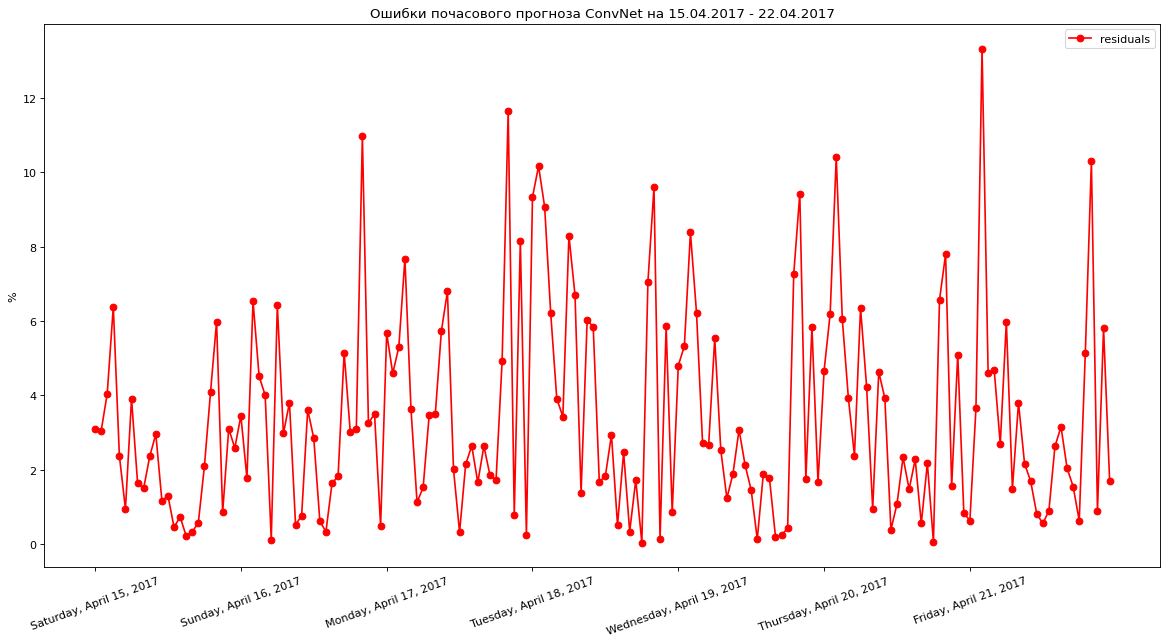

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(hourly_true)), 
         np.abs((np.array(hourly_true).reshape(-1,1) - np.array(hourly_pred_conv).reshape(-1,1)) / 
                (np.array(hourly_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
my_xticks = np.array(data_concat.index[20040:20208].strftime('%A, %B %d, %Y'))
plt.xticks(range(len(hourly_true))[::24], my_xticks[::24], rotation=20)
plt.ylabel('%')
plt.title('Ошибки почасового прогноза ConvNet на 15.04.2017 - 22.04.2017')
plt.legend()
plt.show()

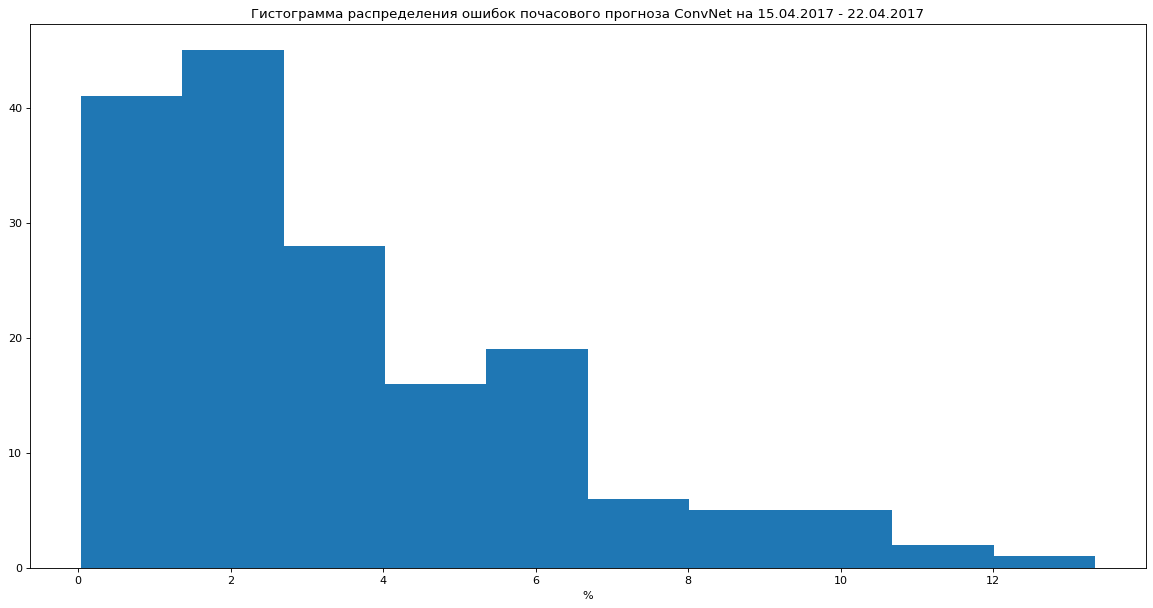

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(hourly_true).reshape(-1,1) - np.array(hourly_pred_conv).reshape(-1,1)) / 
                (np.array(hourly_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок почасового прогноза ConvNet на 15.04.2017 - 22.04.2017')
plt.xlabel('%')
plt.show()

In [ ]:
load_and_pred = data_concat[['actual_load', 'pred_conv', 'baseline']].groupby(data_concat.index).sum()
daily = load_and_pred.loc[(load_and_pred.index>'14.04.2017')&(load_and_pred.index<'16.05.2017')]

In [ ]:
daily_pred_conv = daily['pred_conv']

In [ ]:
daily_mape_conv = mape(np.array(daily_true), np.array(daily_pred_conv))
print(f'MAPE ConvNet ежесуточный прогноз 15.04.2017 - 15.05.2017:\n{round(daily_mape_conv,2)}%')

MAPE ConvNet ежесуточный прогноз 15.04.2017 - 15.05.2017:
1.85%


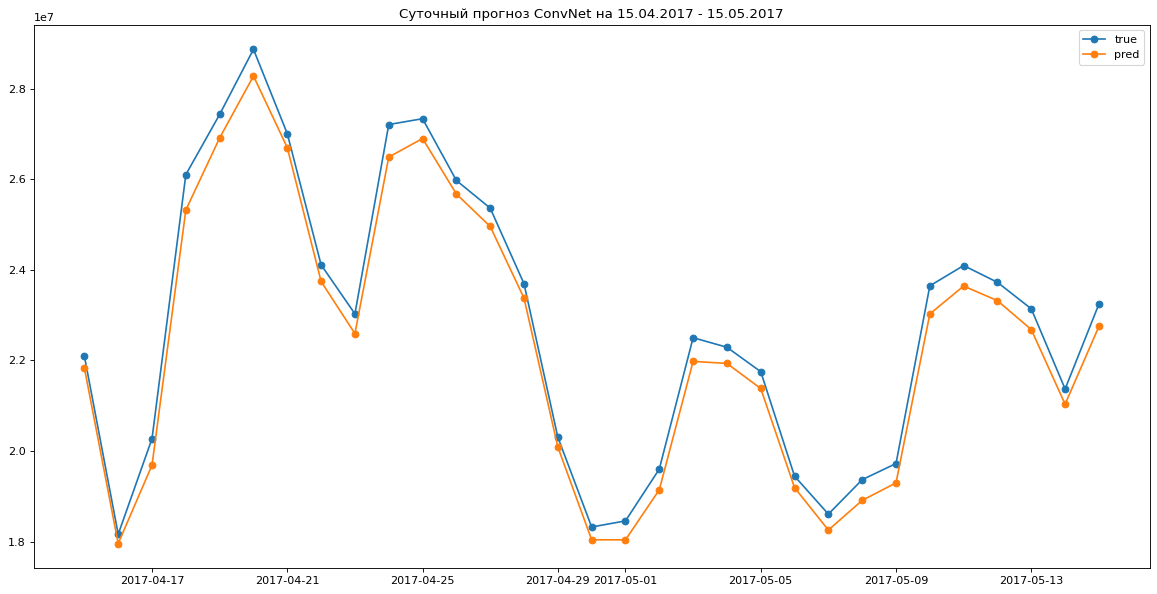

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(daily.index, np.array(daily_true), label='true', marker='o')
plt.plot(daily.index, np.array(np.array(daily_pred_conv), dtype=int), label='pred', marker='o')
plt.title('Суточный прогноз ConvNet на 15.04.2017 - 15.05.2017')
plt.legend()
plt.show()

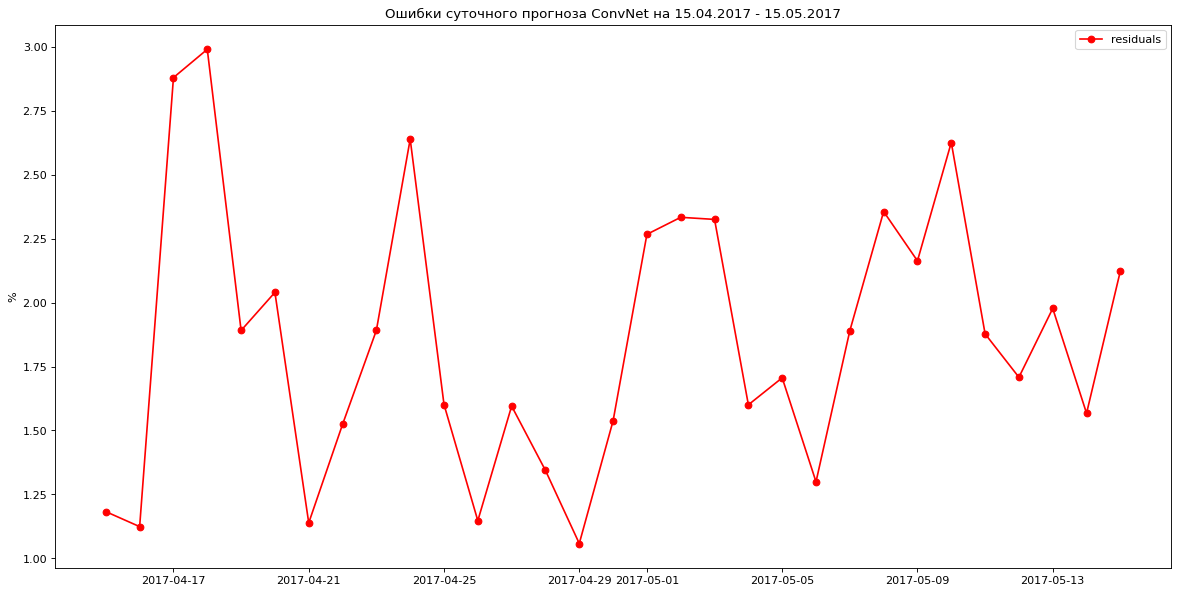

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(daily.index, 
         np.abs((np.array(daily_true).reshape(-1,1) - np.array(daily_pred_conv).reshape(-1,1)) / 
                (np.array(daily_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
plt.title('Ошибки суточного прогноза ConvNet на 15.04.2017 - 15.05.2017')
plt.ylabel('%')
plt.legend()
plt.show()

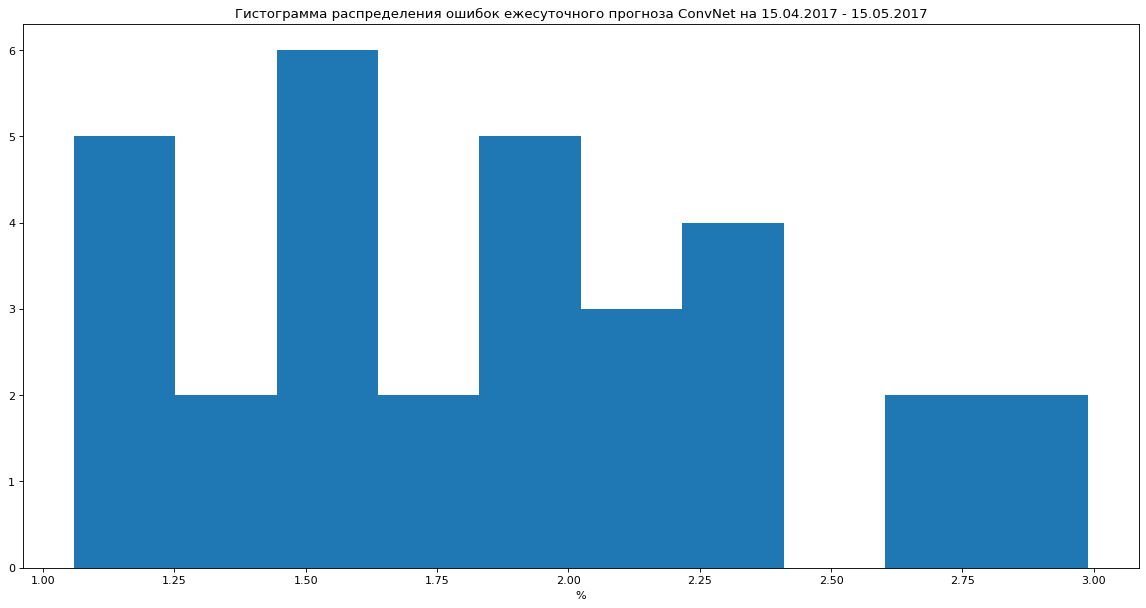

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(daily_true).reshape(-1,1) - np.array(daily_pred_conv).reshape(-1,1)) / (np.array(daily_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок ежесуточного прогноза ConvNet на 15.04.2017 - 15.05.2017')
plt.xlabel('%')
plt.show()

In [ ]:
load_and_pred_month = data_concat[['actual_load', 'pred_conv', 'baseline']].resample('M').sum()
monthly = load_and_pred_month.loc[(load_and_pred_month.index>'2017-03-31')&(load_and_pred_month.index<'2017-10-31')]
monthly

actual_load    pred_conv     baseline
date                                             
2017-04-30  717191722.0  704668637.0  779743800.0
2017-05-31  679718224.0  666794084.0  805735260.0
2017-06-30  658500570.0  645439568.0  779743800.0
2017-07-31  686991813.0  672974631.0  805735260.0
2017-08-31  728606783.0  715059055.0  805735260.0
2017-09-30  668009325.0  656726456.0  779743800.0

In [ ]:
monthly_pred_conv = monthly.pred_conv
monthly_mape_conv = mape(np.array(monthly_true), np.array(monthly_pred_conv))
print(f'MAPE ConvNet ежемесячный прогноз 15.04.2017 - 15.05.2017:\n{round(monthly_mape_conv,2)}%')

MAPE ConvNet ежемесячный прогноз 15.04.2017 - 15.05.2017:
1.87%


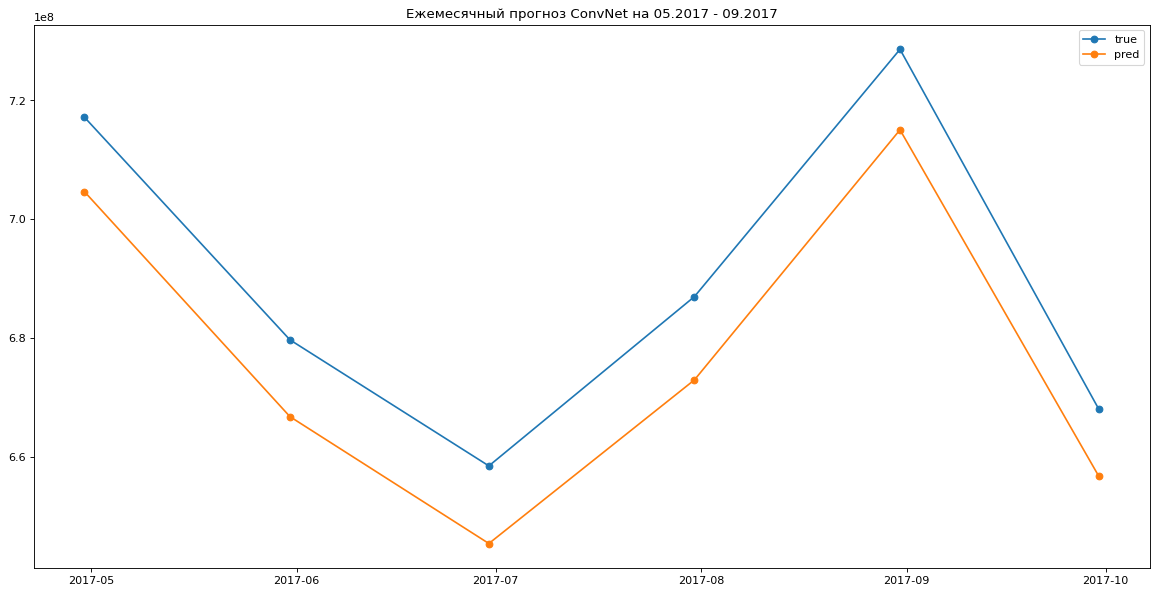

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(monthly.index,monthly_true, label='true', marker='o')
plt.plot(monthly.index,monthly_pred_conv, label='pred', marker='o')
plt.title('Ежемесячный прогноз ConvNet на 05.2017 - 09.2017')
plt.legend()
plt.show()

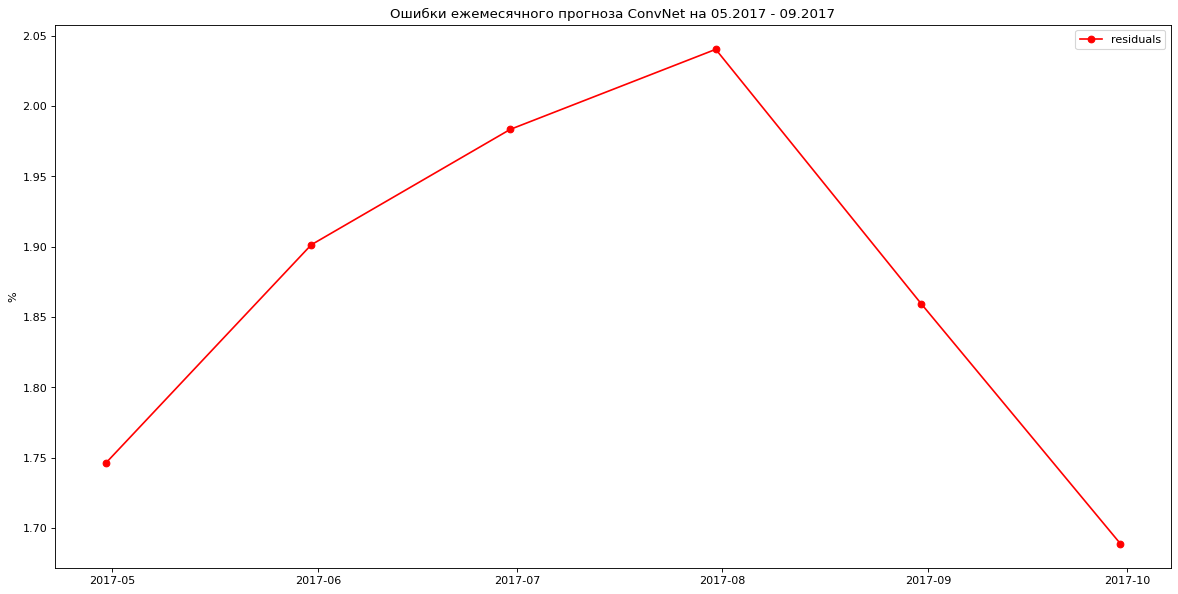

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(monthly.index, 
         np.abs((np.array(monthly_true).reshape(-1,1) - np.array(monthly_pred_conv).reshape(-1,1)) / 
                (np.array(monthly_true).reshape(-1,1)))*100, 
         label='residuals', marker='o', color='r')
plt.title('Ошибки ежемесячного прогноза ConvNet на 05.2017 - 09.2017')
plt.ylabel('%')
plt.legend()
plt.show()

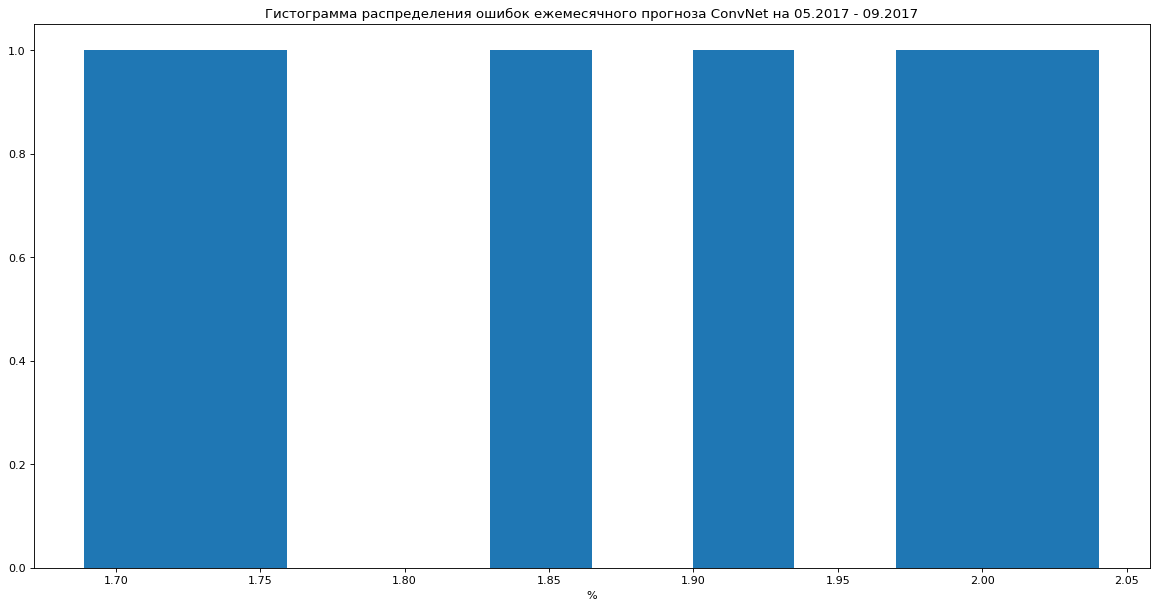

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(np.abs((np.array(monthly_true).reshape(-1,1) - np.array(monthly_pred_conv).reshape(-1,1)) / (np.array(monthly_true).reshape(-1,1)))*100)
plt.title('Гистограмма распределения ошибок ежемесячного прогноза ConvNet на 05.2017 - 09.2017')
plt.xlabel('%')
plt.show()

In [ ]:
final_report = pd.DataFrame(columns=['XGBoost', 'LightGBM', 'ConvNet', 'Baseline'],
                             index=['Overal MAPE', 'Hourly MAPE', 'Daily MAPE', 'Monthly MAPE'])

final_report.XGBoost = [general_mape_xgb, hourly_mape_xgb, daily_mape_xgb, monthly_mape_xgb]
final_report.LightGBM = [general_mape_lgbm, hourly_mape_lgbm, daily_mape_lgbm, monthly_mape_lgbm]
final_report.ConvNet = [general_mape_conv, hourly_mape_conv, daily_mape_conv, monthly_mape_conv]
final_report.Baseline = [baseline_mape, baseline_hourly, baseline_daily, baseline_monthly]
final_report = final_report.round(2)

Итоговые значения ошибок для всех моделей

In [ ]:
final_report

XGBoost  LightGBM  ConvNet  Baseline
Overal MAPE      4.49      4.12     3.38     27.68
Hourly MAPE     10.10     10.14     3.40     27.24
Daily MAPE       6.83      6.15     1.85     18.00
Monthly MAPE     1.33      1.51     1.87     15.05

<Figure size 1440x720 with 0 Axes>

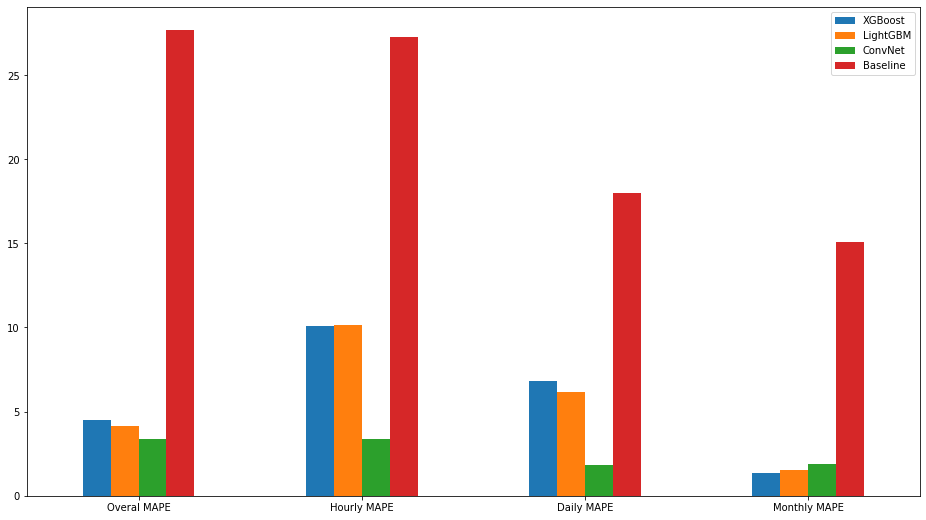

In [ ]:
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
final_report.plot.bar(figsize=(16, 9), rot=0)

# Выводы, наблюдения и описание возможностей улучшения.

Если не учитывать некоторую предвзятость оценки, связанную с ручным заполнением части целевых данных (периода в конце июня 2017 года, который модели прогнозируют) перед применением машинного обучения, то можно сделать следующие выводы.

Все три модели показали удовлетворительные результаты прогноза (MAPE<=10%, лучше наивного прогноза по медиане), но с учетом слабой стохастичности анализируемых временных рядов (более-менее постоянные закономерности потребления) пространство для повышения точности велико в моделях, основанных на деревьях (XGBoost и LGBM). В частности, при суточном прогнозе видно, что модели недостаточно точно моделируют зависимость потребления энергии от дней недели (особенно проблемы со вторником и средой, но это скорее аномалия конкретной анализируемой недели). Кроме того, гистограммы распределения ошибок не демонстрируют уменьшения величины ошибки по мере увеличения количества ошибок, что может быть следствием неправильного выбора моделей и алгоритма прогнозирования.


При базовом анализе ошибки двух упомянутых моделей не имеют четкой структуры, за исключением предсказания 16 и 17 апреля 2017 года, когда фактические данные были значительно ниже предсказанных. Возможно, больший датасет (данные за дополнительные 2-3 года) смог бы решить эту проблему.

Здесь также важно понимать, что является более критичным для клиента - сэкономить на выработке энергии, или быть уверенным, что выработанная энергия покроет потребности потребителей. Свойство MAPE предполагает, что при одинаковой абсолютной разнице между значениями (напр. прогноз 100/факт 150 и прогноз 150/факт 100), ошибка может быть выше в случае, когда прогноз превышает фактическое значение (50/150 = 0.33, 50/100 = 0.5), что делает оценку (и оптимизацию с ее помощью) предвзятой и может стимулировать более низкие значения прогноза, следование которому приведет к невозможности удовлетворить спрос. Это поднимает вопрос выбора метрики и визуальной оценки фактического и прогнозируемого графиков. Возможно, стоит стремиться к тому, чтоб обезопасить себя более высоким прогнозом даже в ущерб более высокому значению ошибки.

Автоматический тюнинг гиперпараметров не проводился в силу того, что меньшее значение ошибки для всего периода прогноза не обязательно отвечало меньшему значению для каждого из прогнозиремых периодов. Возможно, рационально применять несколько моделей, и использовать разные модели для прогноза с разной частотностью (напр. XGBoost для ежемесячных прогнозов, LGBM для ежечасовых и ежедневных).

Наилучшие результаты продемонстрировала CNN, обученная на предсказании следующего часового на основании предыдущих 15. На некоторых интервалах нейронная сеть выдавала ошибку в более чем 10 раз ниже, чем XGBoost и LGBM (хотя в абсолютных величинах 0.39% отклонения в ежемесячном прогнозе может быть равным около 5 млн. единиц потребления; кроме того, итоговые результаты имеют сильную вариацию до 2% при повторном обучении и прогнозе). Впрочем, главной причиной низкой ошибки видятся не отличия в ее архитектурных свойствах и внутреннем алгоритме аппроксимации функций от двух остальных моделей, а скорее способ подготовки данных в вмде окон временных рядов. На одном из этапов использовалась также 1-D и 2-D CNN для прогноза по табличным переменным (также, как для XGBoost и LGBM), результаты оказались значительно хуже. Для чистоты эксперимента необходимо провести прогноз XGBoost и LGBM на данных, подготовленых как для CNN.


Очевидными направлениями улучшений могут служить:

*   придание рядам стационарности и последующее применение модели ARIMA для прогноза и скользящей средней для наивного прогноза;
*   автоматический или ручной перебор гиперпараметров для использовавшейся нейронной сети или использование другой архитектуры (на разных этапах применялись CNN, LSTM, MLP и модуль внимания из модели-трансформера, возможно, стоит попытаться использовать TNN);
*   использование stacked regression (пытался это реализовать, но столкнулся с ошибкой wrapper-а scikeras для нейронной сети на keras, ошибка видимо как-то связана с размерностью входных данных, т.к. ранее получалось использовать модели на keras в stacked regression);
*   изменение алгоритма прогнозирования - рассчет суточной и месячной потребности не из часовых данных, а прогнозирование сразу суточных и месячных данных напрямую через модель;
*   создание дополнительных переменных, которые бы более явно указывали на зависимость потребления от дней недели; добавление праздников, отметок об окончании недели/месяца/года, хронологический анализ ситуации реального мира с целью выявления дополнительных факторов потребления;
*   использование другого метода восполнения пропусков в данных.